In [14]:
import xarray as xr
import pandas as pd
import numpy as np 
import ocetrac
from matplotlib import pyplot as plt
import datetime
import netCDF4 
from datetime import date
from datetime import timedelta
import glob
from matplotlib.colors import ListedColormap
from datetime import date, timedelta, datetime

In [2]:
folder = 'C:/Users/24048369/OneDrive - The University of Western Australia/MHW_Project_FHL/'
file_TAS   = "GLORYS_data_TAS_(1).nc"
file_NAA   = "GLORYS_data_NA.nc"

ds_TAS = xr.open_dataset(folder + file_TAS)
ds_NAA = xr.open_dataset(folder + file_NAA)


ds_NAA
ds_TAS

<xarray.Dataset>
Dimensions:    (depth: 28, latitude: 121, longitude: 121, time: 10408)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 3.819 ... 186.1 222.5 266.0
  * latitude   (latitude) float32 -48.0 -47.92 -47.83 ... -38.17 -38.08 -38.0
  * longitude  (longitude) float32 140.0 140.1 140.2 140.2 ... 149.8 149.9 150.0
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2021-06-30
Data variables:
    thetao     (time, depth, latitude, longitude) float32 ...
Attributes: (12/25)
    Conventions:               CF-1.4
    bulletin_date:             2021-07-07 00:00:00
    bulletin_type:             operational
    comment:                   CMEMS product
    domain_name:               GL12
    easting:                   longitude
    ...                        ...
    references:                http://www.mercator-ocean.fr
    source:                    MERCATOR GLORYS12V1
    title:                     daily mean fields from Global Ocean Physics An...
    z_max:                     5727.9169921875
    z_min:                     0.49402499198913574
    copernicusmarine_version:  1.3.2

In [14]:
# Name_platform = 'SurfTemp'
# ClimatologyPeriod = [1993, 2021]
# MHWPeriod = [1993, 2021]

# mhwname = 'MHWS'
# depth = 0
# plot_folder  = ''

# # Create a regular daily time vector from 1 Jan 1992 to 31 Dec 2019
# from datetime import timedelta
# times_dates = np.arange(datetime.datetime(ClimatologyPeriod[0],1,1), datetime.datetime(ClimatologyPeriod[1]+1,1,1), timedelta(days=1)).astype(datetime.datetime)
# t = np.array([times_dates[i].toordinal() for i in range(len(times_dates)) ])  # final daily time vector 

# times_dates

In [48]:
## data used: 

tos = ds_TAS.sel(depth = 50,method = 'nearest').drop('depth')
climatology = tos.groupby(tos.time.dt.month).mean()
anomaly = tos.groupby(tos.time.dt.month) - climatology
# Rechunk time dim
if tos.chunks:
    tos = tos.chunk({'time': -1})
percentile = .9
threshold = tos.groupby(tos.time.dt.month).quantile(percentile, dim='time', keep_attrs=True, skipna=True)
hot_water = anomaly.groupby(tos.time.dt.month).where(tos.groupby(tos.time.dt.month)>threshold)
threshold


# tos1 = ds_TAS.sel(latitude = -48,method = 'nearest').drop('latitude')
# climatology1 = tos1.groupby(tos1.time.dt.month).mean()
# anomaly1 = tos1.groupby(tos1.time.dt.month) - climatology1
# # Rechunk time dim
# if tos1.chunks:
#     tos1 = tos1.chunk({'time': -1})
# percentile = .9
# threshold1 = tos1.groupby(tos1.time.dt.month).quantile(percentile, dim='time', keep_attrs=True, skipna=True)
# hot_water1 = anomaly1.groupby(tos1.time.dt.month).where(tos1.groupby(tos1.time.dt.month)>threshold1)
# threshold1


# tos2 = ds_TAS.sel(longitude = 150,method = 'nearest').drop('longitude')
# climatology2 = tos2.groupby(tos2.time.dt.month).mean()
# anomaly2 = tos2.groupby(tos2.time.dt.month) - climatology2
# # Rechunk time dim
# if tos2.chunks:
#     tos2 = tos2.chunk({'time': -1})
# percentile = .9
# threshold2 = tos2.groupby(tos2.time.dt.month).quantile(percentile, dim='time', keep_attrs=True, skipna=True)
# hot_water2 = anomaly2.groupby(tos2.time.dt.month).where(tos2.groupby(tos2.time.dt.month)>threshold2)
# threshold2

C:\Users\24048369\AppData\Local\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
C:\Users\24048369\AppData\Local\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
C:\Users\24048369\AppData\Local\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
C:\Users\24048369\AppData\Local\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
C:\Users\24048369\AppData\Local\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
C:\Users\24048369\AppData\Local\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_bas

<xarray.Dataset>
Dimensions:    (latitude: 121, longitude: 121, month: 12)
Coordinates:
  * latitude   (latitude) float32 -48.0 -47.92 -47.83 ... -38.17 -38.08 -38.0
  * longitude  (longitude) float32 140.0 140.1 140.2 140.2 ... 149.8 149.9 150.0
    quantile   (month) float64 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    thetao     (month, latitude, longitude) float64 11.49 11.55 ... 17.84 18.3
Attributes: (12/25)
    Conventions:               CF-1.4
    bulletin_date:             2021-07-07 00:00:00
    bulletin_type:             operational
    comment:                   CMEMS product
    domain_name:               GL12
    easting:                   longitude
    ...                        ...
    references:                http://www.mercator-ocean.fr
    source:                    MERCATOR GLORYS12V1
    title:                     daily mean fields from Global Ocean Physics An...
    z_max:                     5727.9169921875
    z_min:                     0.49402499198913574
    copernicusmarine_version:  1.3.2

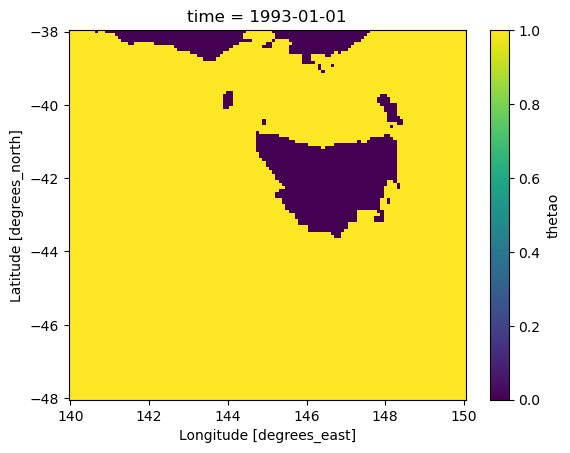

In [4]:
mask_ocean = 1 * np.ones(tos.thetao.shape[1:]) * np.isfinite(tos.isel(time=0))
mask_land = 0 * np.ones(tos.thetao.shape[1:]) * np.isnan(tos.isel(time=0))
mask = mask_ocean + mask_land
mask.thetao.plot()

<xarray.Dataset>
Dimensions:    (latitude: 121, longitude: 121, time: 10408)
Coordinates:
  * latitude   (latitude) float32 -48.0 -47.92 -47.83 ... -38.17 -38.08 -38.0
  * longitude  (longitude) float32 140.0 140.1 140.2 140.2 ... 149.8 149.9 150.0
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2021-06-30
    month      (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 6 6 6 6 6 6 6 6 6 6 6 6
Data variables:
    thetao     (time, latitude, longitude) float32 -0.3035 -0.2145 ... 0.1133

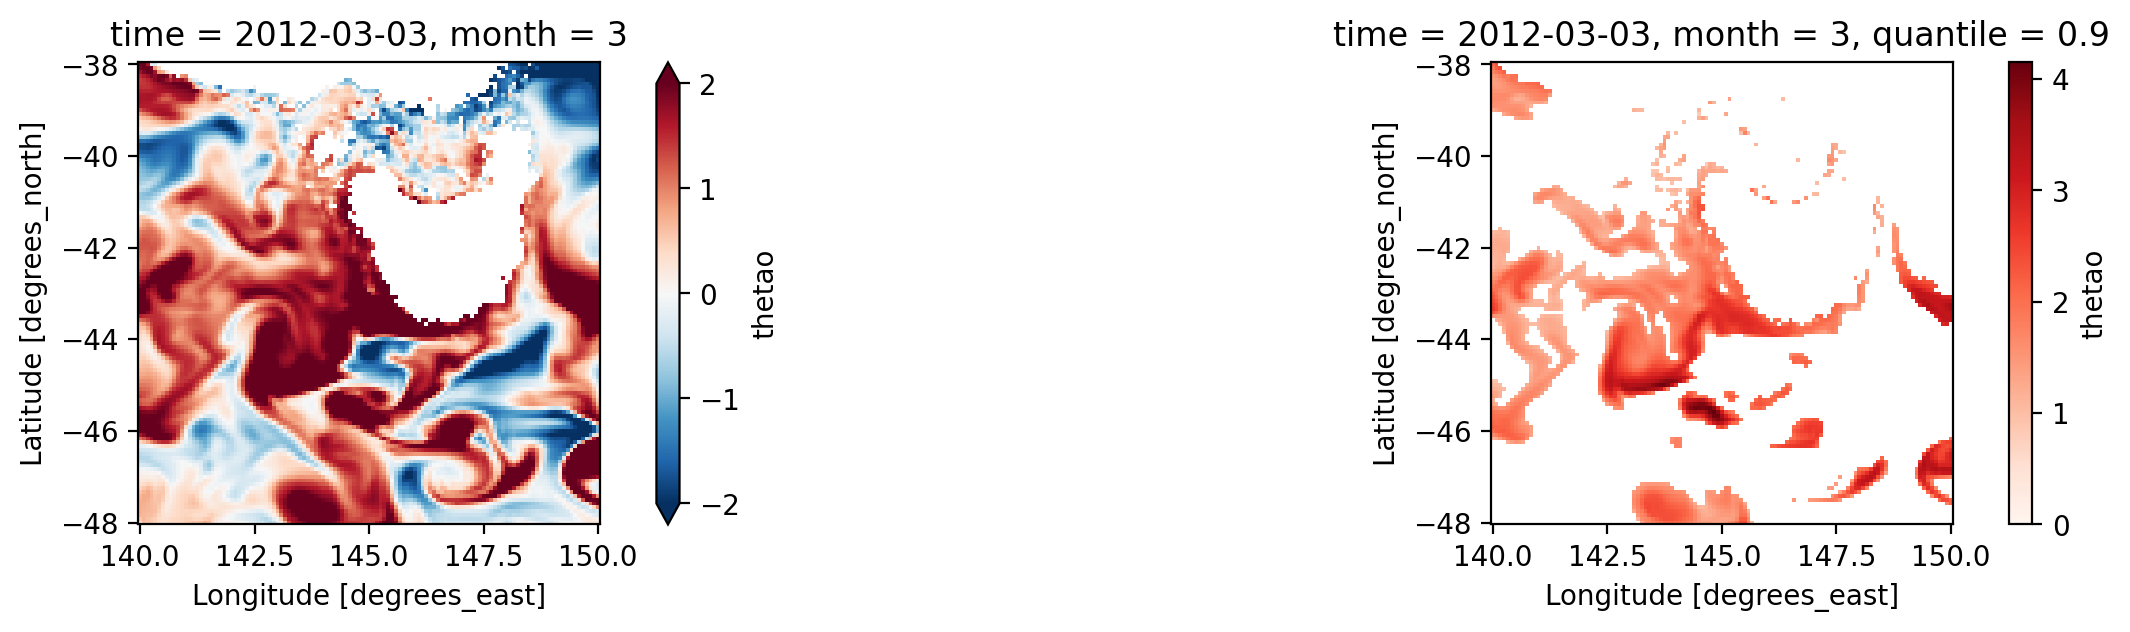

In [49]:
plt.figure(figsize=(16,3),dpi = 200)
t = 7001
ax1 = plt.subplot(121);anomaly.thetao.isel(time=t).plot(cmap='RdBu_r', vmin=-2, vmax=2, extend='both')
# ax1.invert_yaxis()
# mask.thetao.where(mask==0).plot.contourf(colors='k', add_colorbar=False); 
ax1.set_aspect('equal');

ax2 = plt.subplot(122); hot_water.thetao.isel(time=t).plot(cmap='Reds', vmin=0);
# ax2.invert_yaxis()
# mask.where(mask==0).plot.contourf(colors='k', add_colorbar=False); 
ax2.set_aspect('equal');

anomaly

In [51]:
# lat = anomaly.latitude.data
# lon = anomaly.longitude.data
# depth = ds_TAS.depth.data
# X, Y,Z = np.meshgrid(lon, lat,depth)

# fig = plt.figure(figsize=(10, 5))
# # First subplot (3D projection)
# ax1 = fig.add_subplot(1, 2, 1, projection='3d')
# # ax1.plot_surface(lat,lon, anomaly.thetao.isel(time=t),cmap='RdBu_r', vmin=-2, vmax=2)
# # ax1.plot_surface(X,Y, -1, 
# #                  facecolors=plt.cm.viridis(anomaly.thetao.isel(time=t).data), shade=False)

# ax1.contourf( X[:, :, 0], Y[:, :, 0], anomaly.thetao.isel(time=t).data[:, :], zdir='z', offset=0, cmap = 'RdBu_r')
# ax1.contourf( X[0, :, :], Y[0, :, 0], anomaly1.thetao.isel(time=t).data[:, :], zdir='z', offset=0, cmap = 'RdBu_r')
# ax1.contourf( X[:,-1, 0], Y[0,-1, :], anomaly2.thetao.isel(time=t).data[:, :], zdir='z', offset=0, cmap = 'RdBu_r')


# # Second subplot (3D projection)
# ax2 = fig.add_subplot(1, 2, 2, projection='3d')



In [50]:
mask1 = mask #.mean('latitude')
mask1 = mask1.rename({'latitude': 'y'}).rename({'longitude': 'x'})
hot_water_short = hot_water.sel(time = slice('2015-09-01','2016-07-30'))#.mean('latitude')
hot_water_short = hot_water_short.rename({'latitude': 'y'}).rename({'longitude': 'x'})

Tracker = ocetrac.Tracker(hot_water_short.thetao, mask1.thetao, radius=2, min_size_quartile=0.75, timedim = 'time', xdim = 'x', ydim='y', positive=True)
blobs = Tracker.track()



minimum area: 186.25
inital objects identified 	 3284
final objects tracked 	 66


In [52]:
# np.where(blobs.data ==113)
blobs.attrs

{'inital objects identified': 3284,
 'final objects tracked': 66,
 'radius': 2,
 'size quantile threshold': 0.75,
 'min area': 186.25,
 'percent area reject': 0.13698620083746932,
 'percent area accept': 0.8630137991625307}

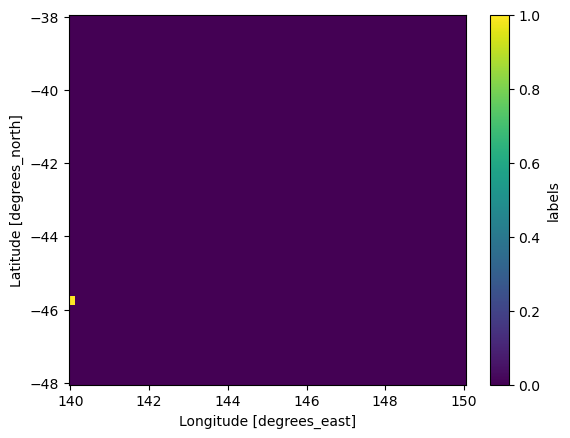

In [53]:
blobs.attrs
event = (blobs==17).any("time")
event.plot()
# event

# blobs

C:\Users\24048369\AppData\Local\Temp\ipykernel_11504\2030459273.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(ncols=2, nrows =1, figsize=(8,3),dpi = 150)


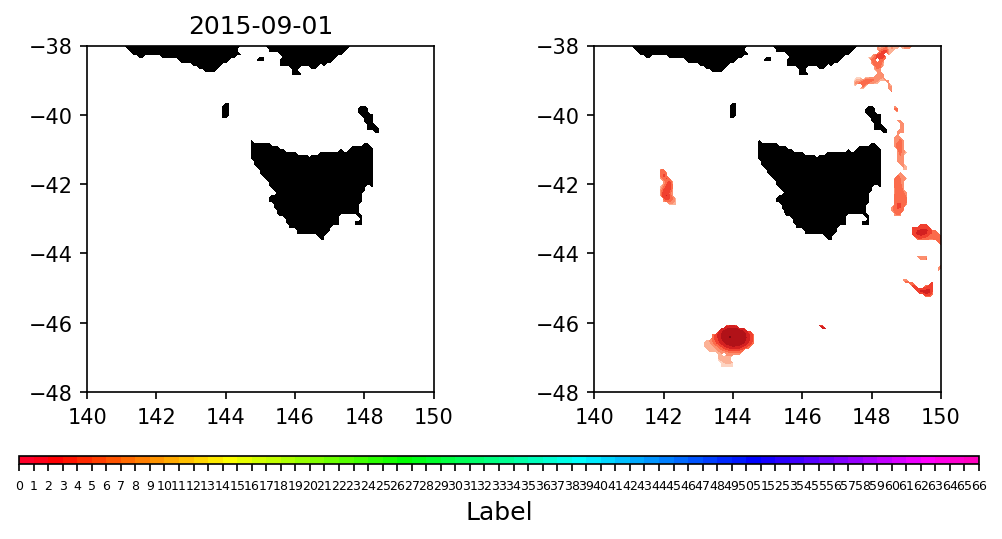

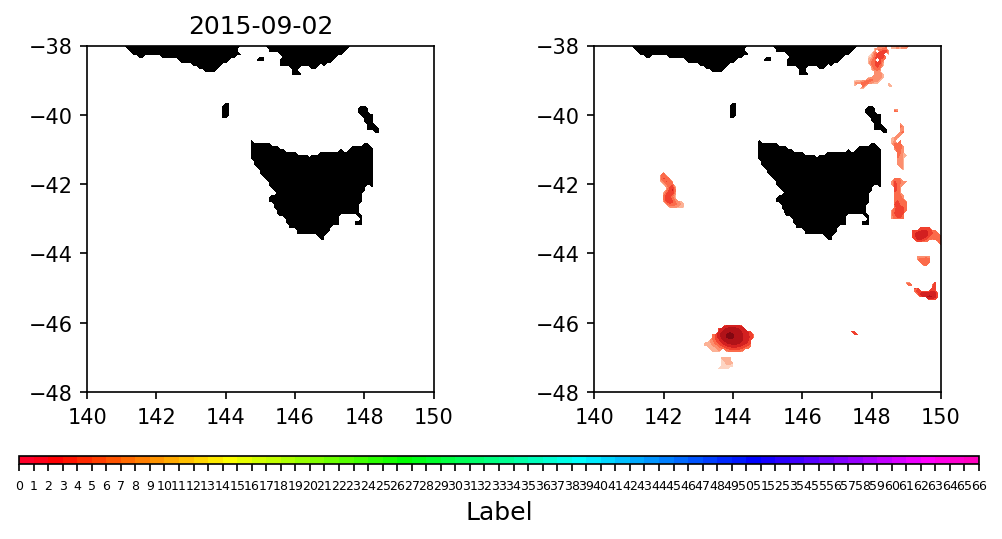

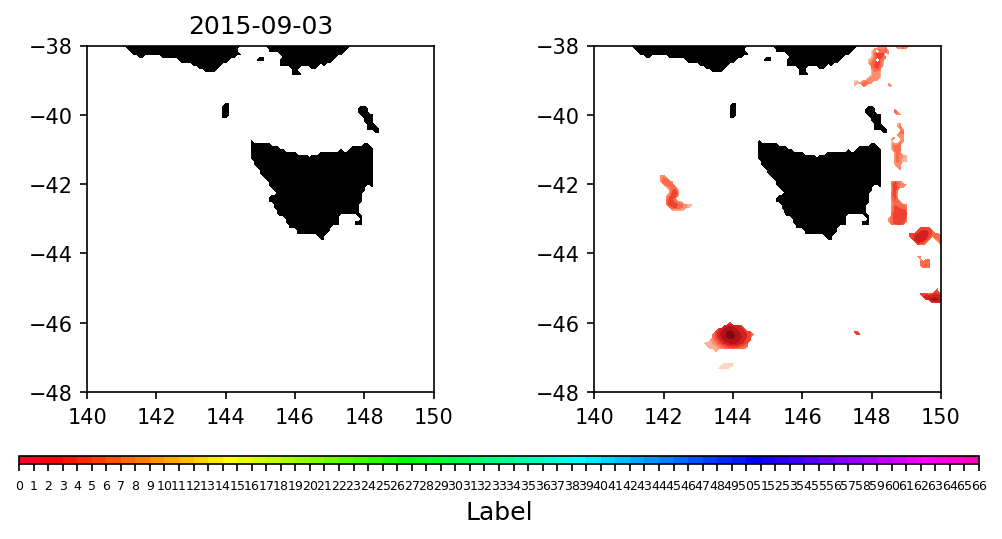

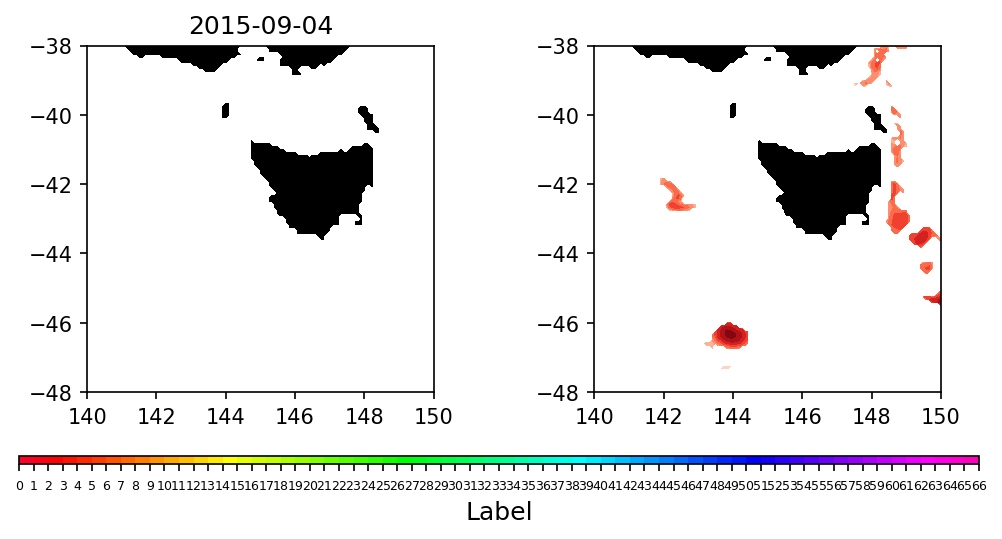

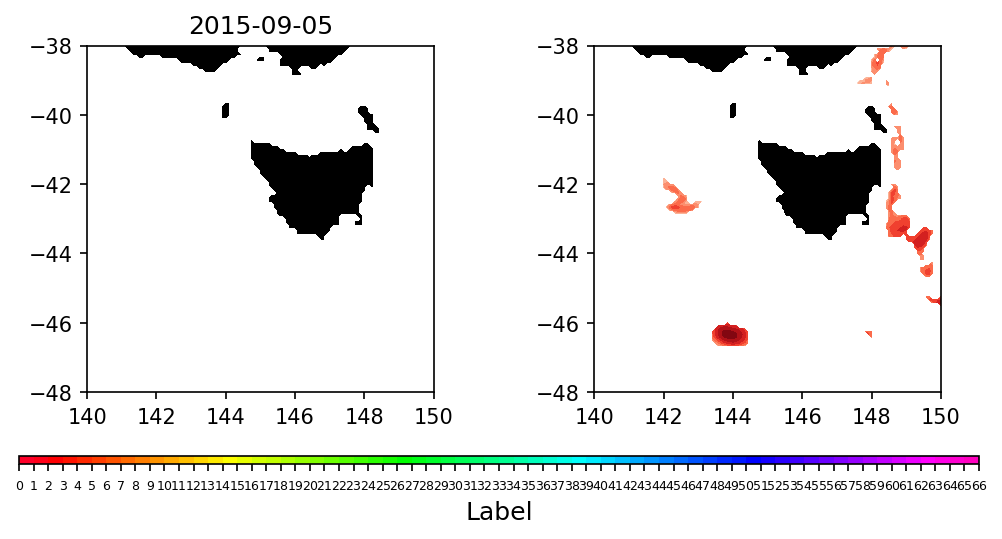

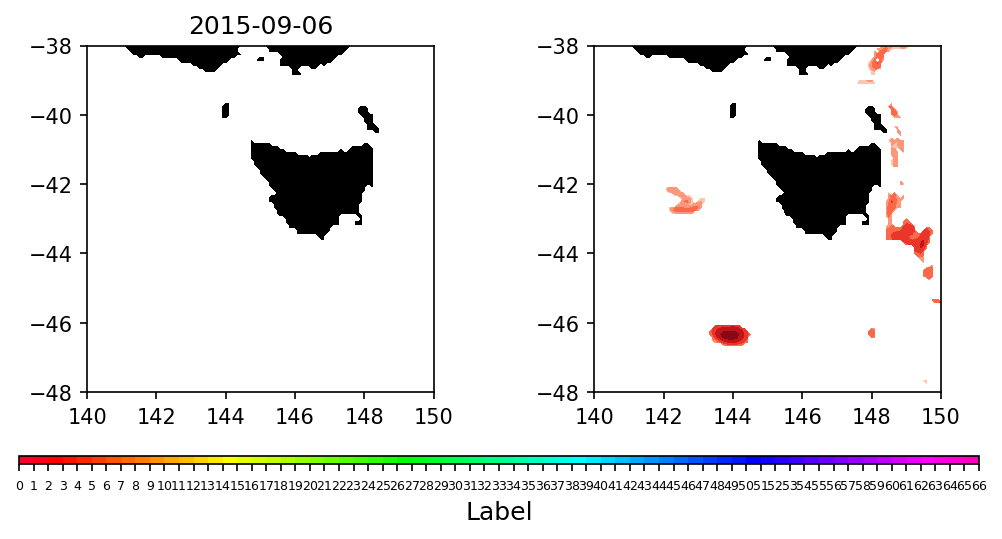

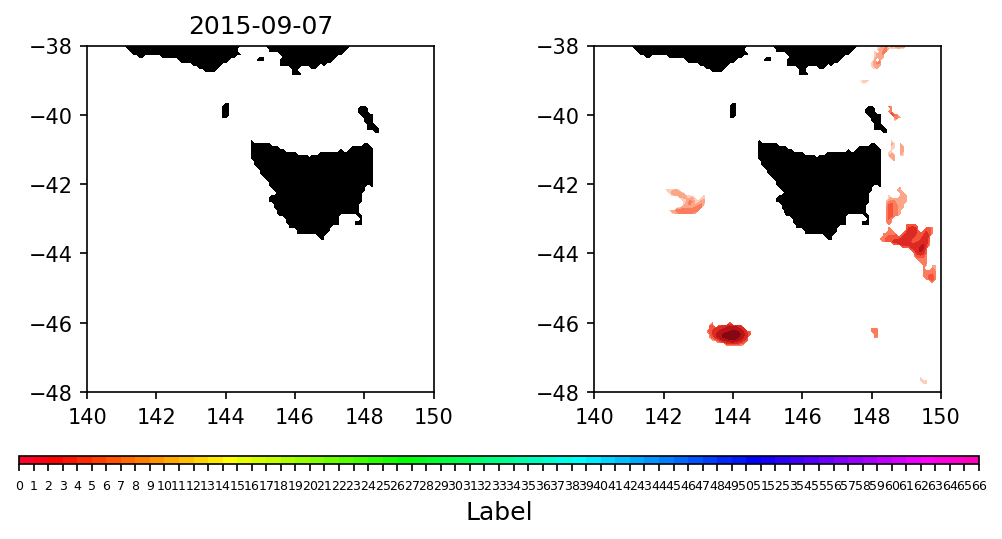

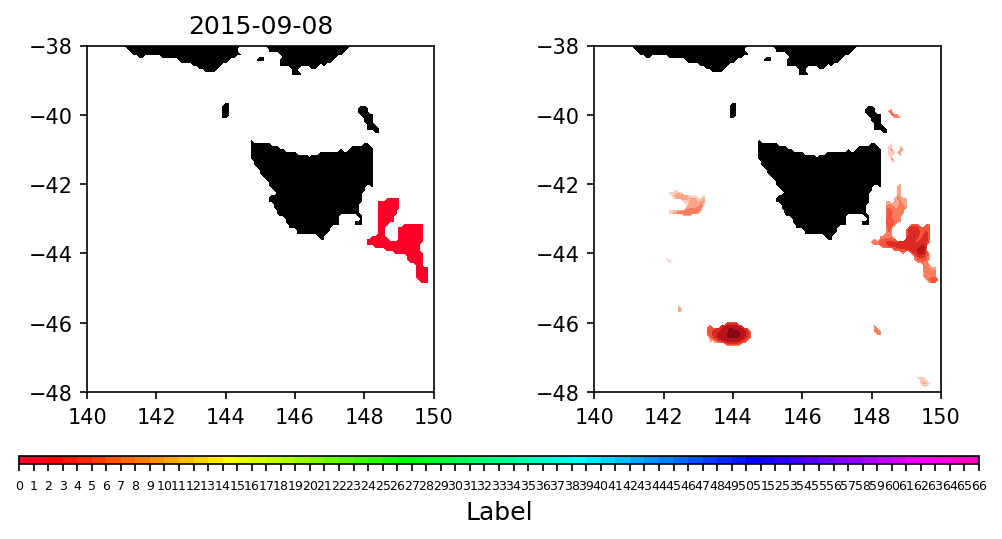

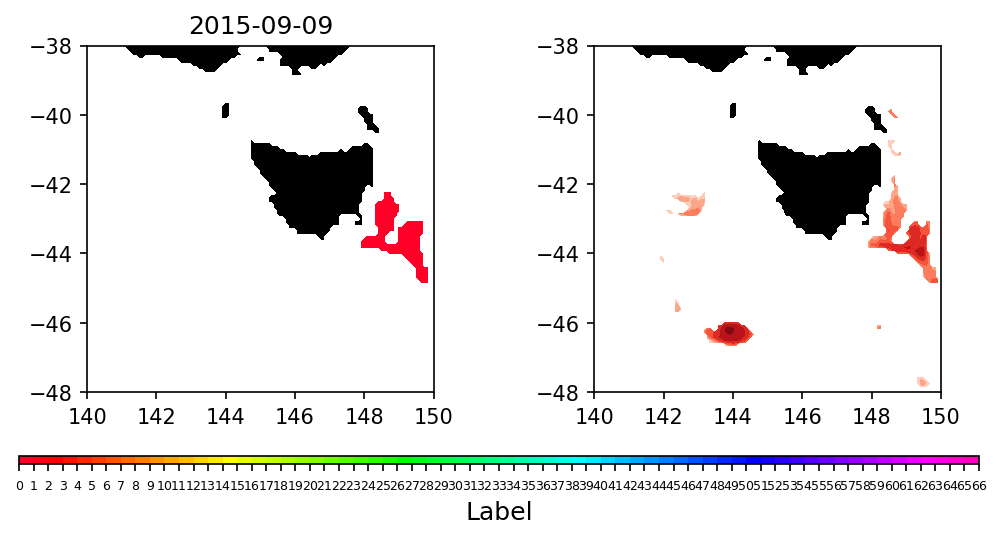

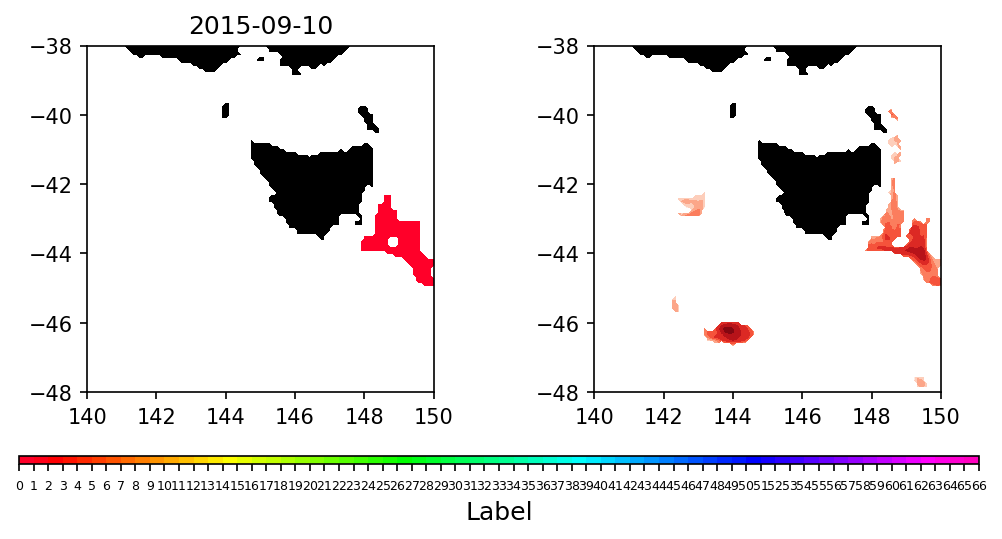

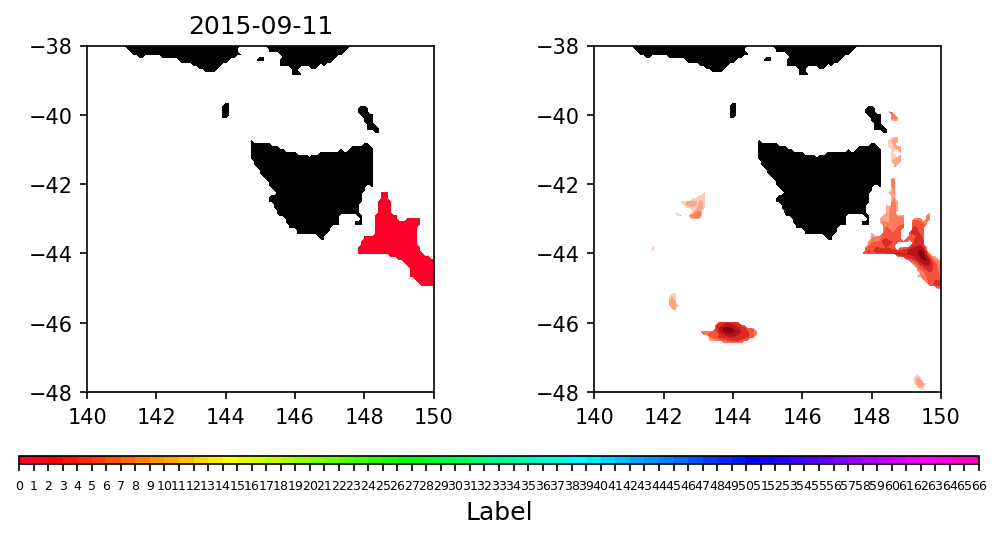

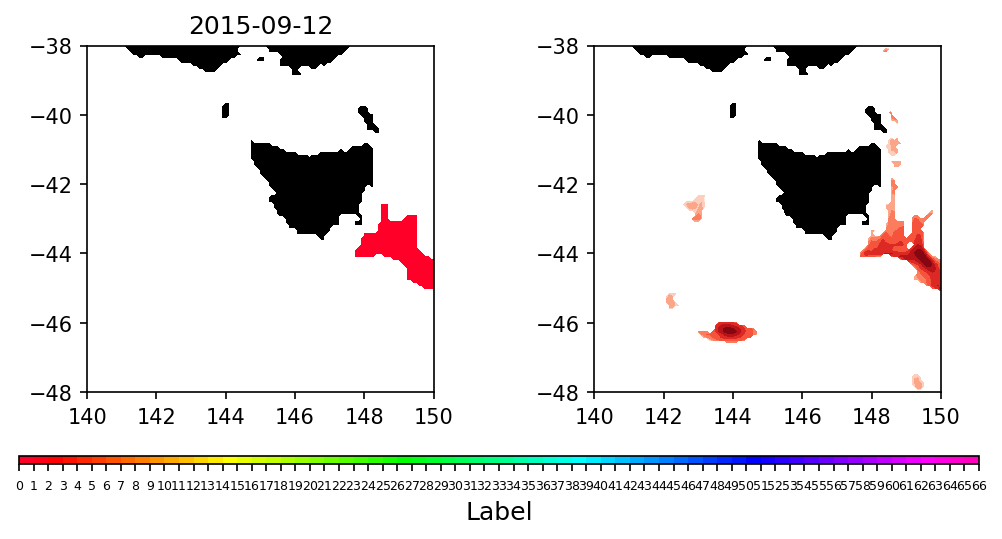

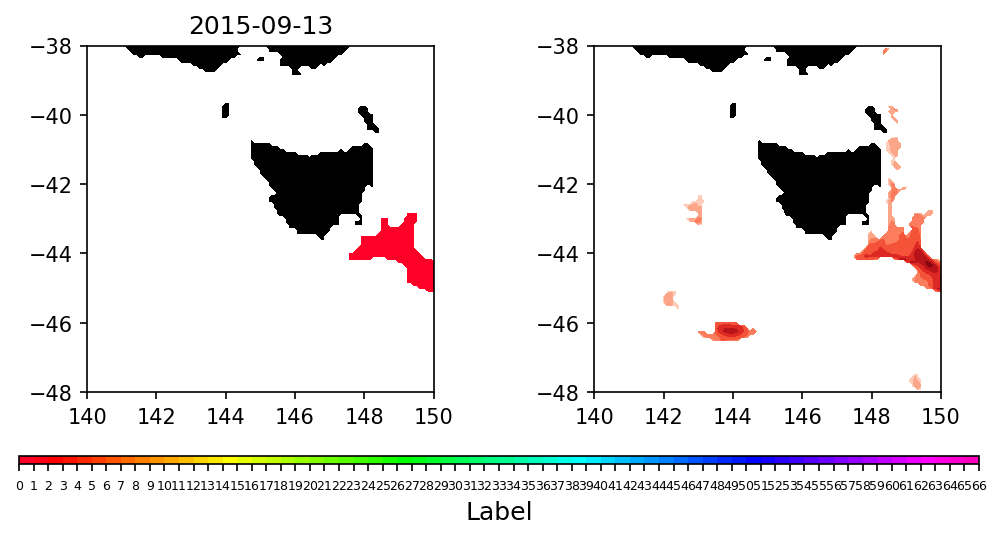

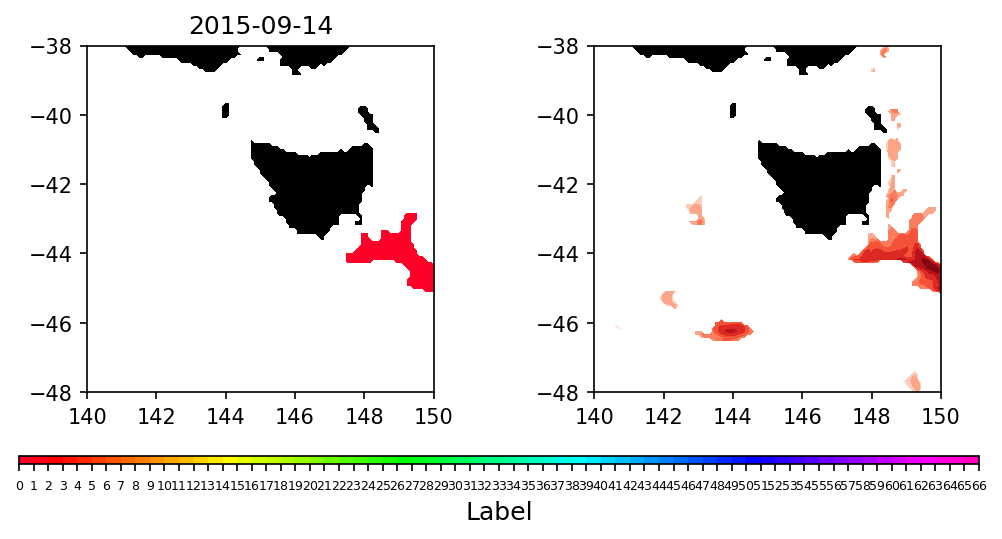

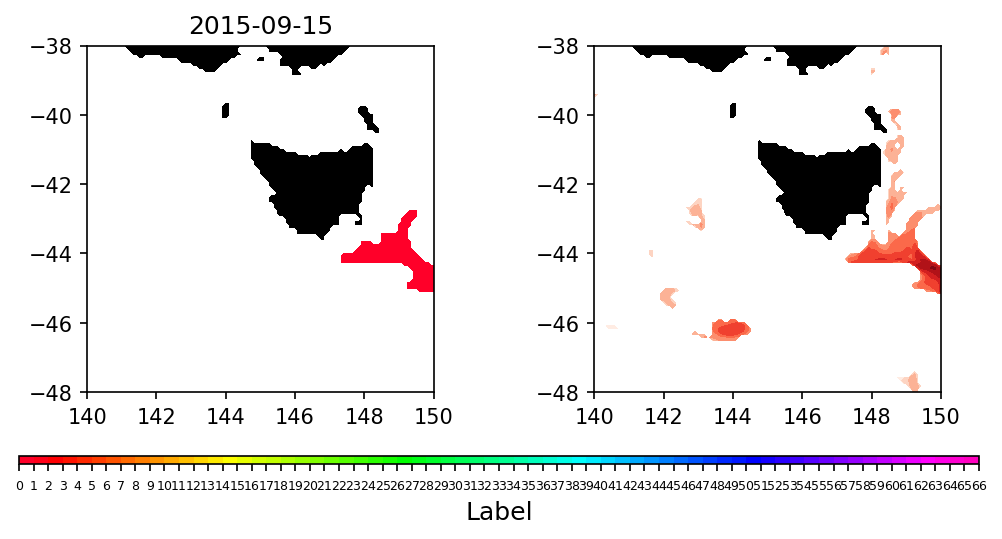

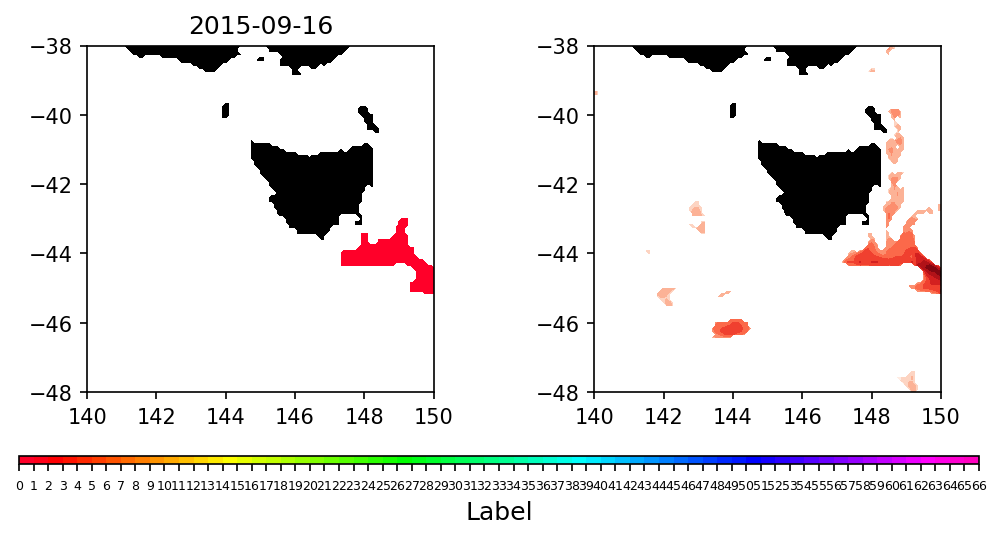

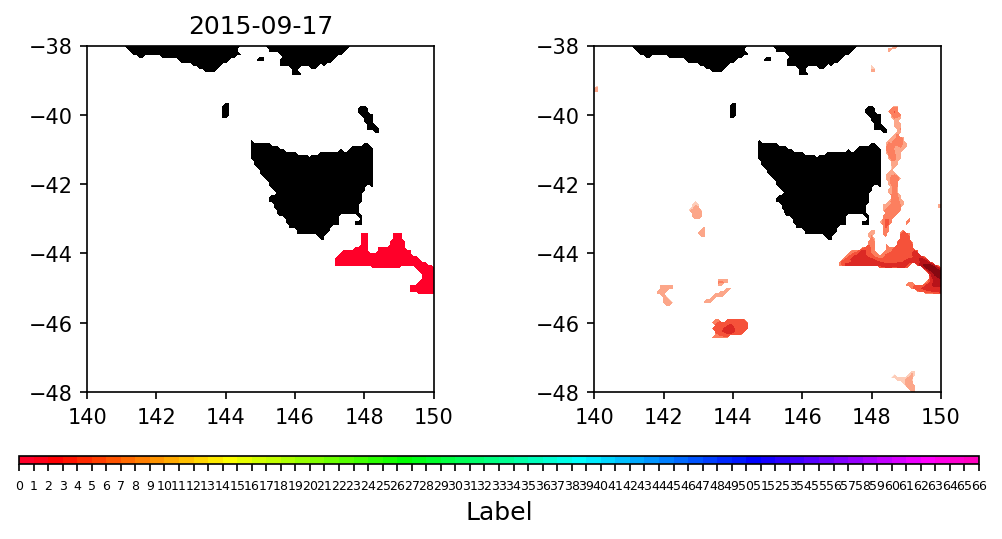

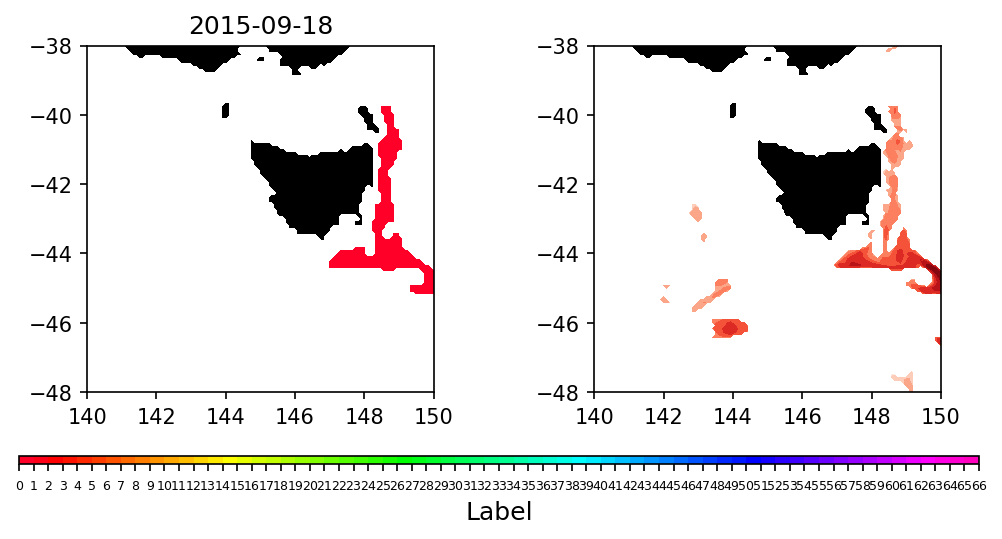

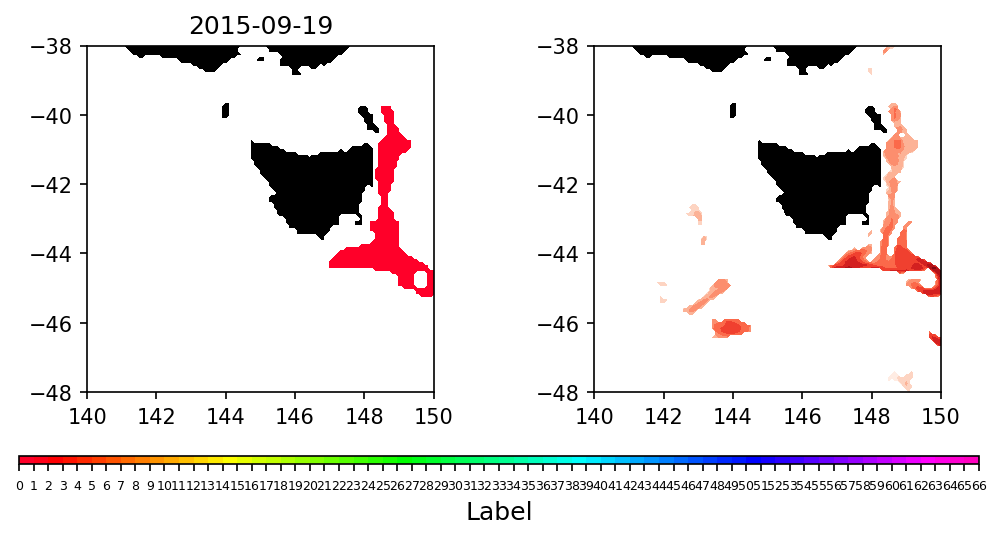

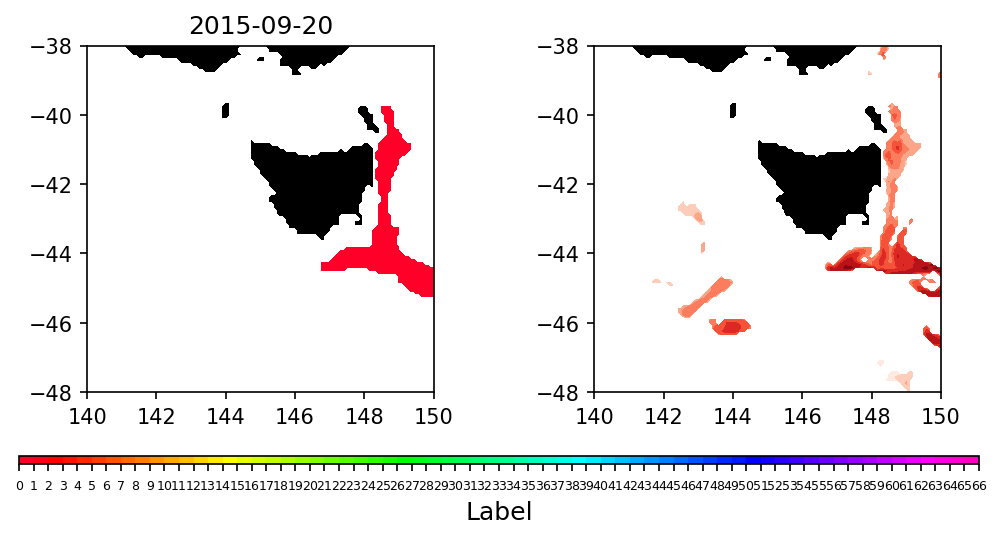

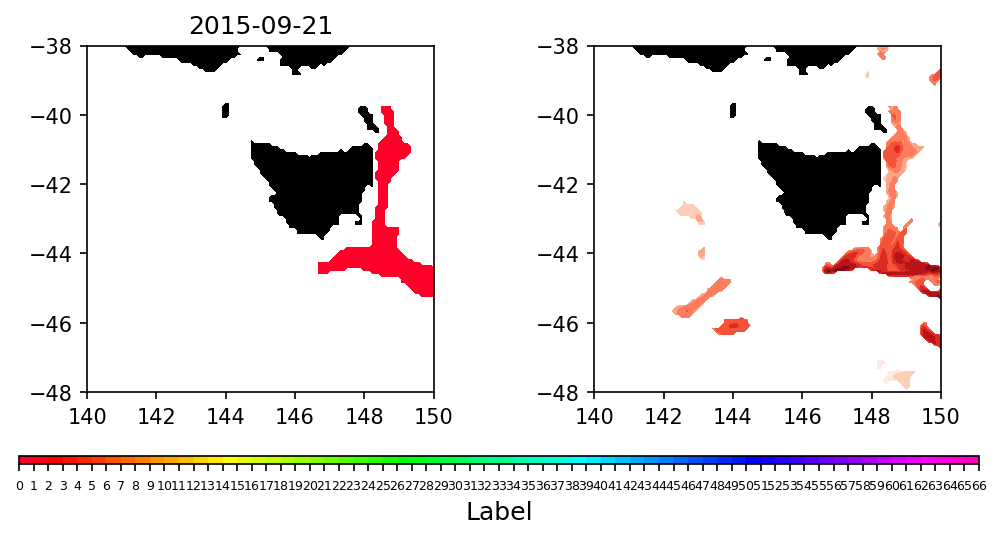

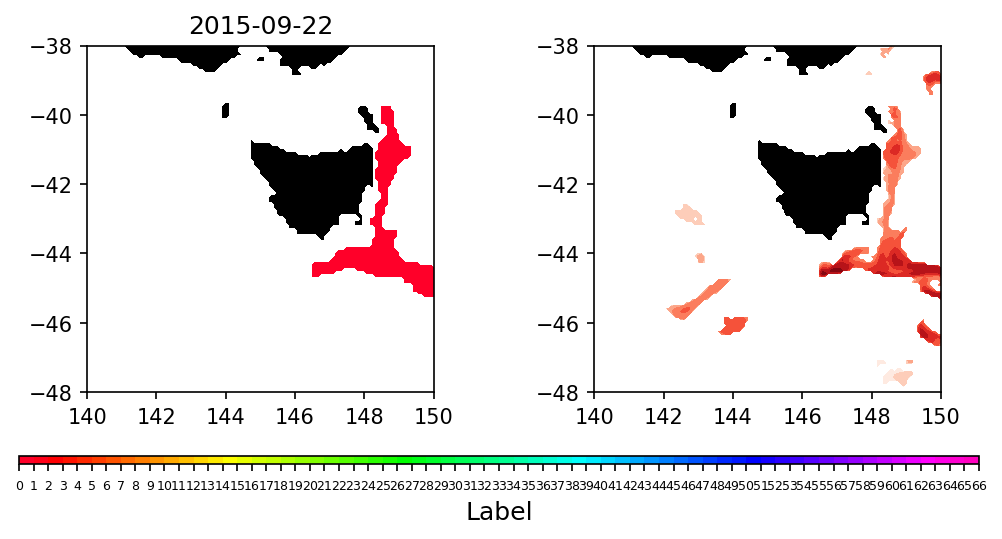

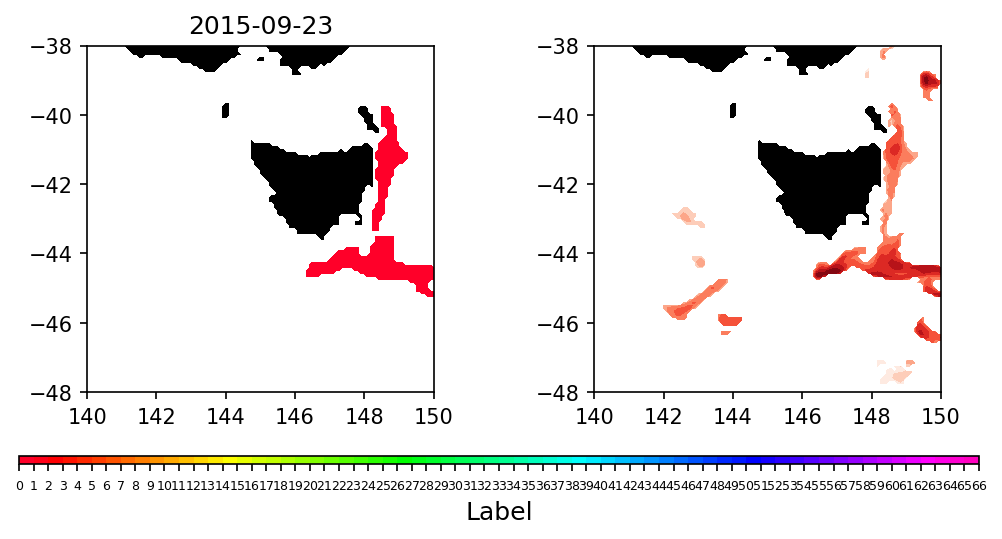

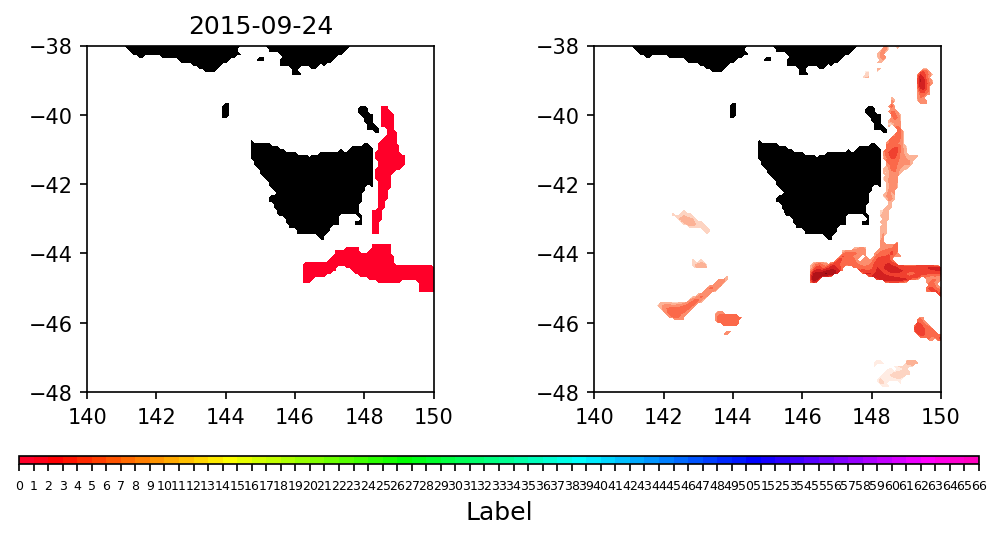

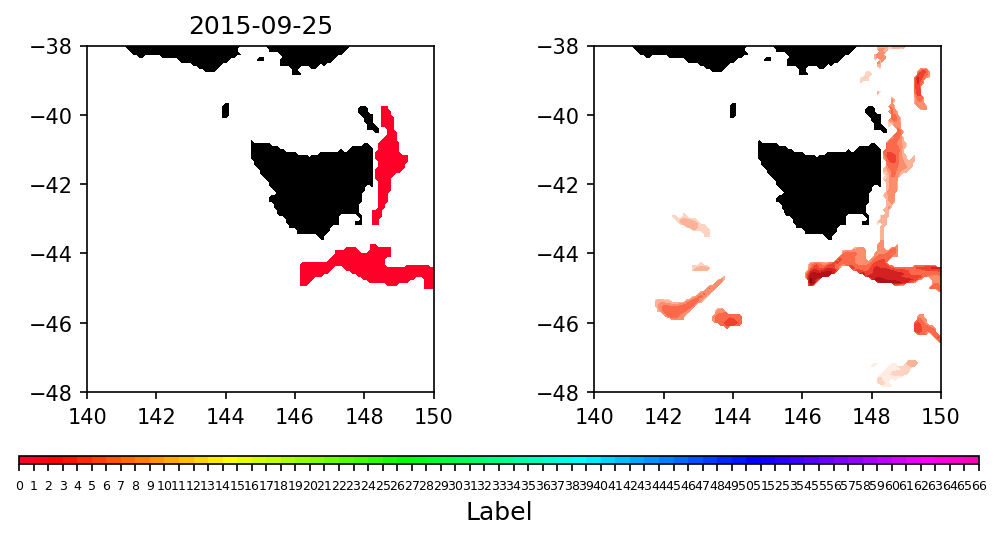

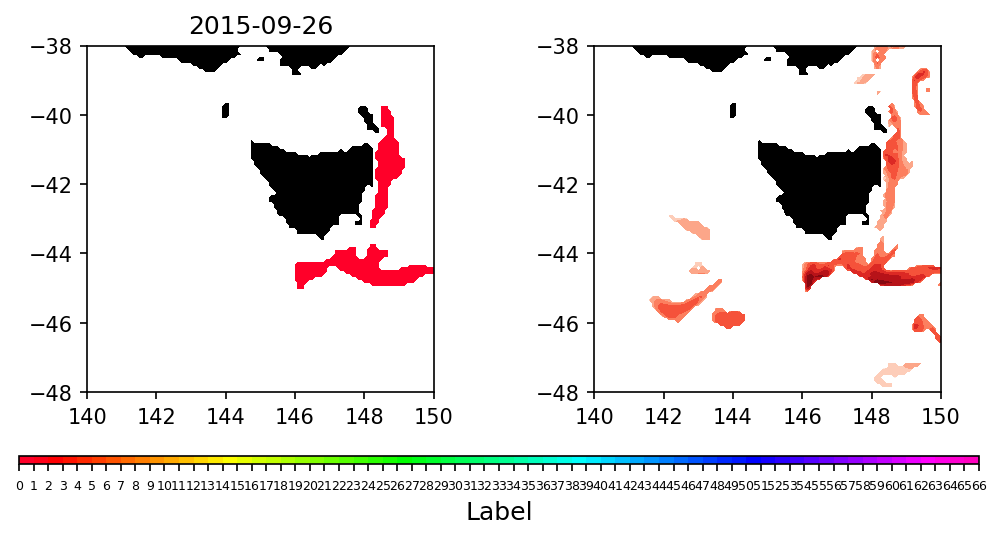

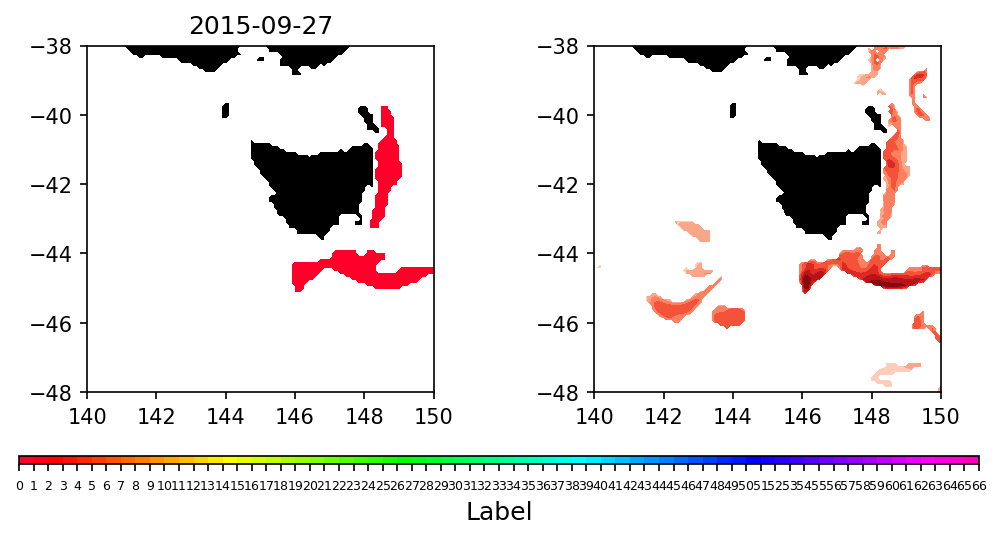

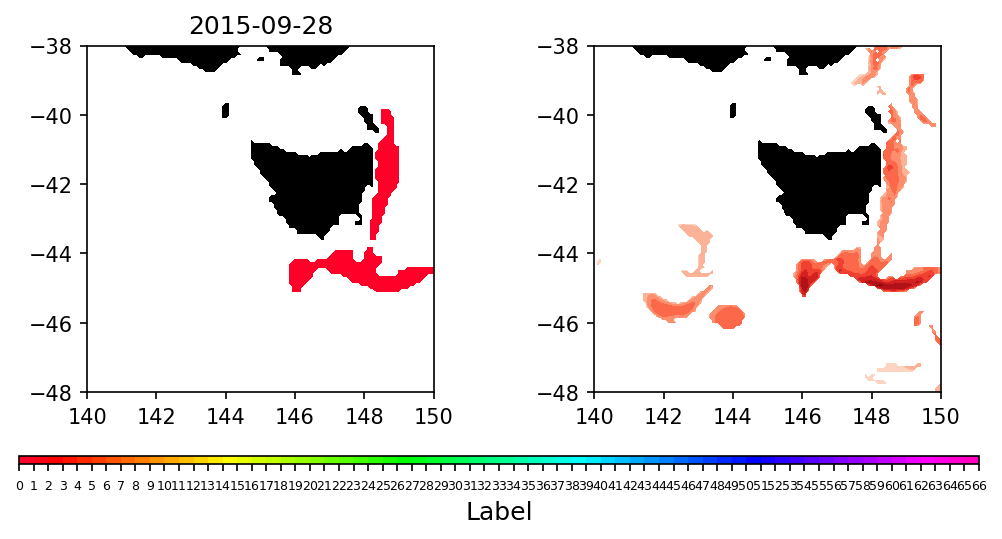

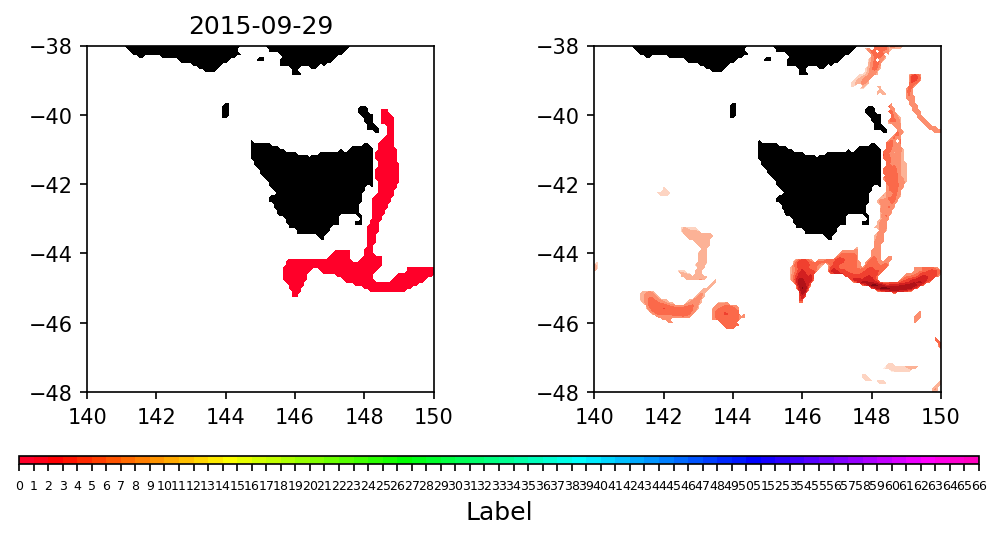

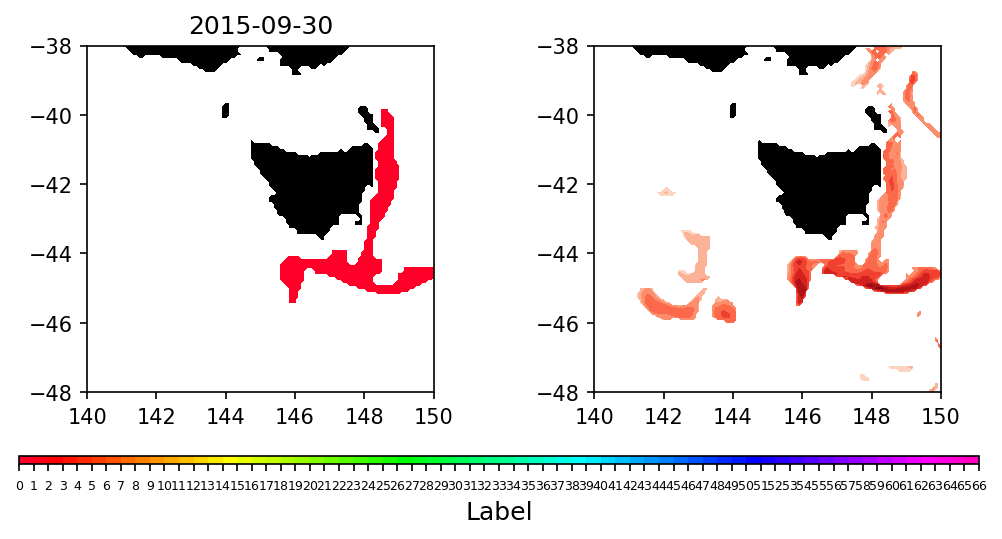

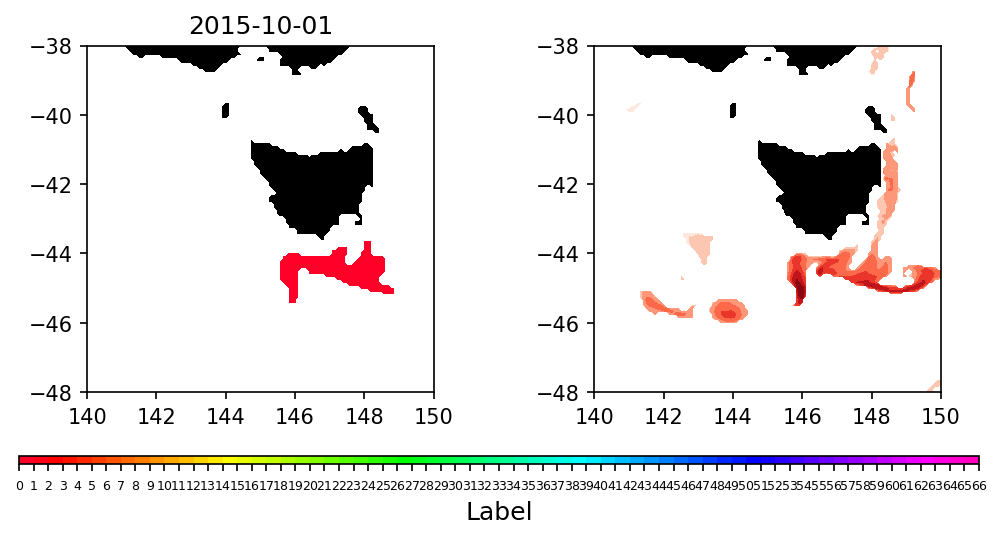

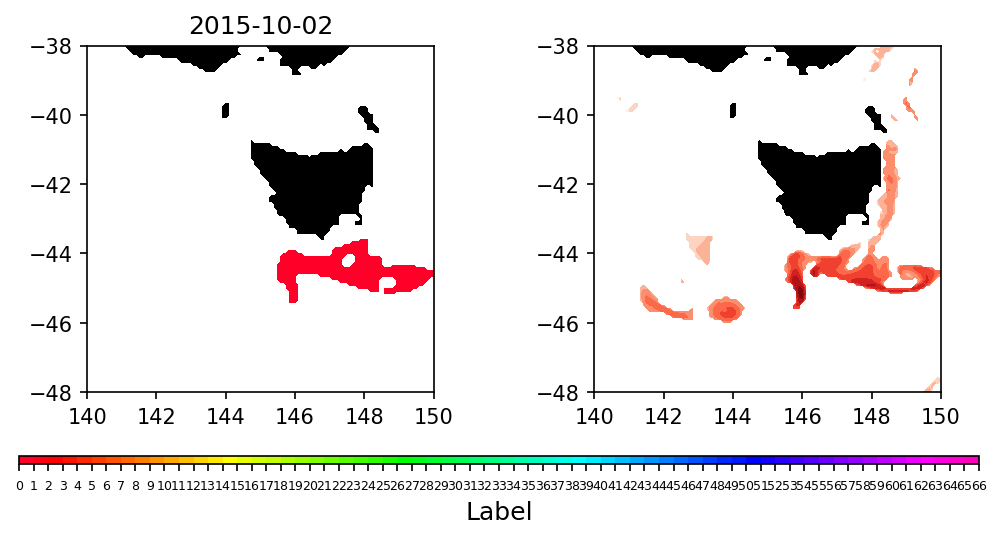

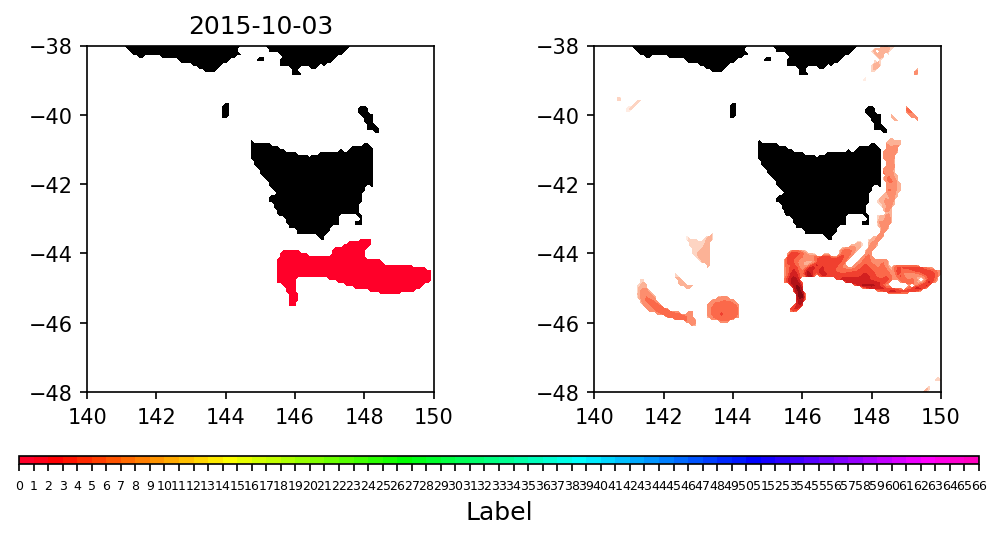

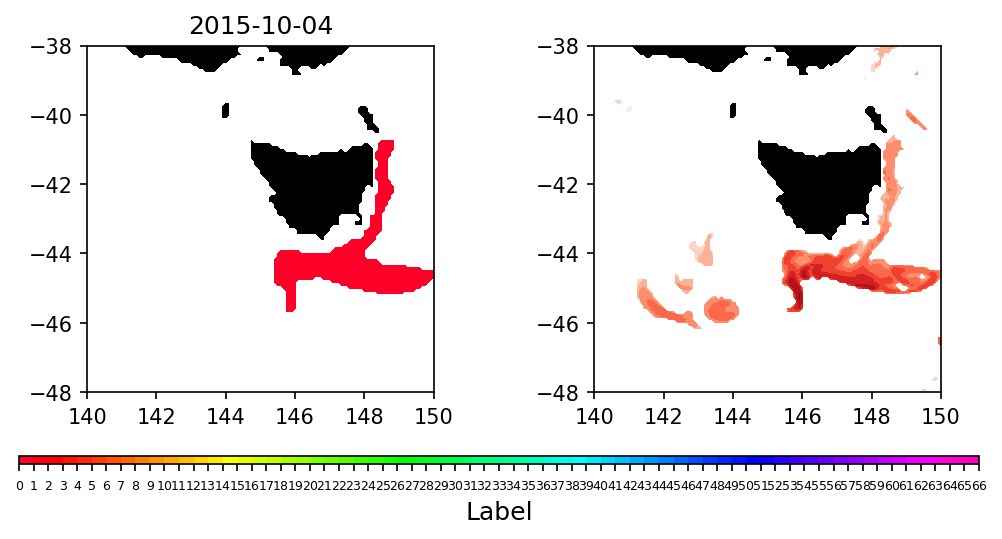

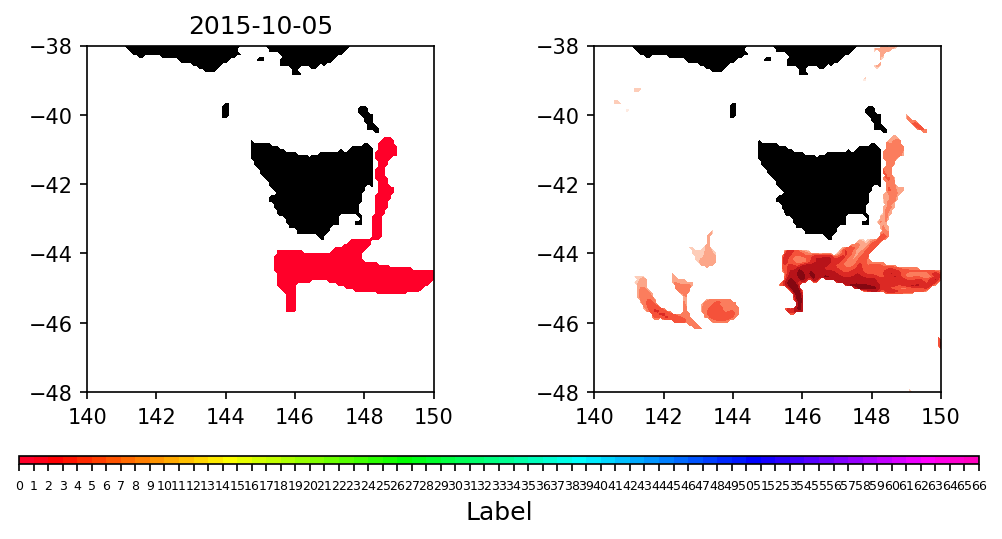

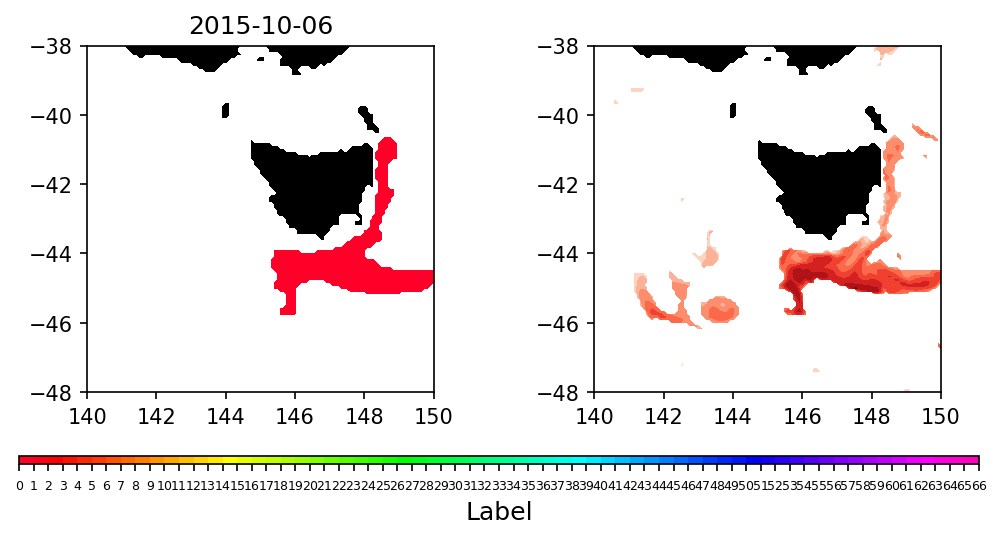

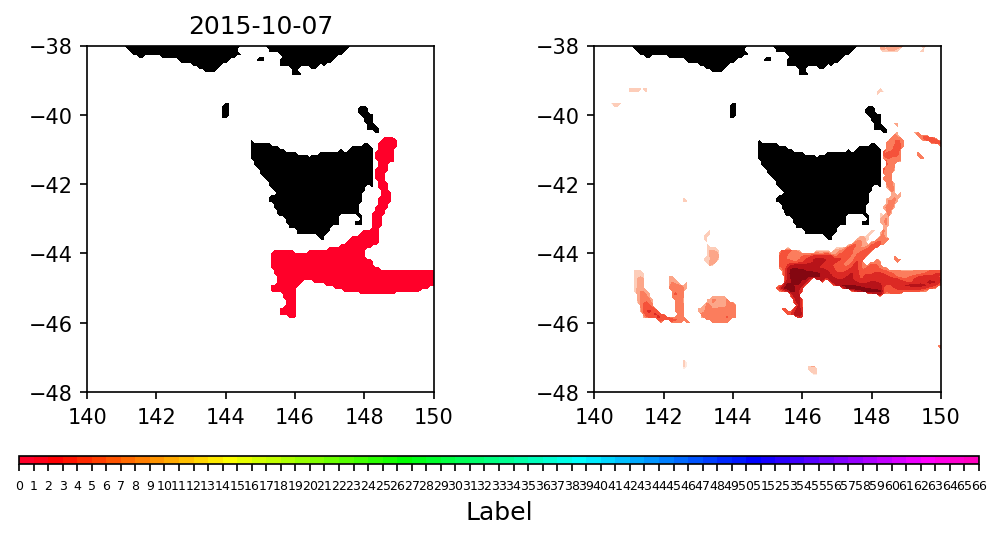

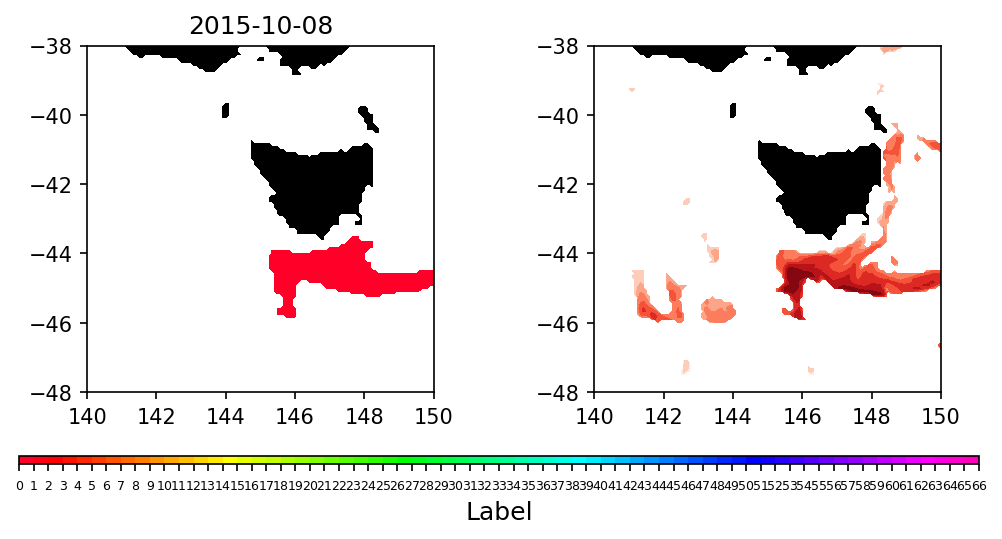

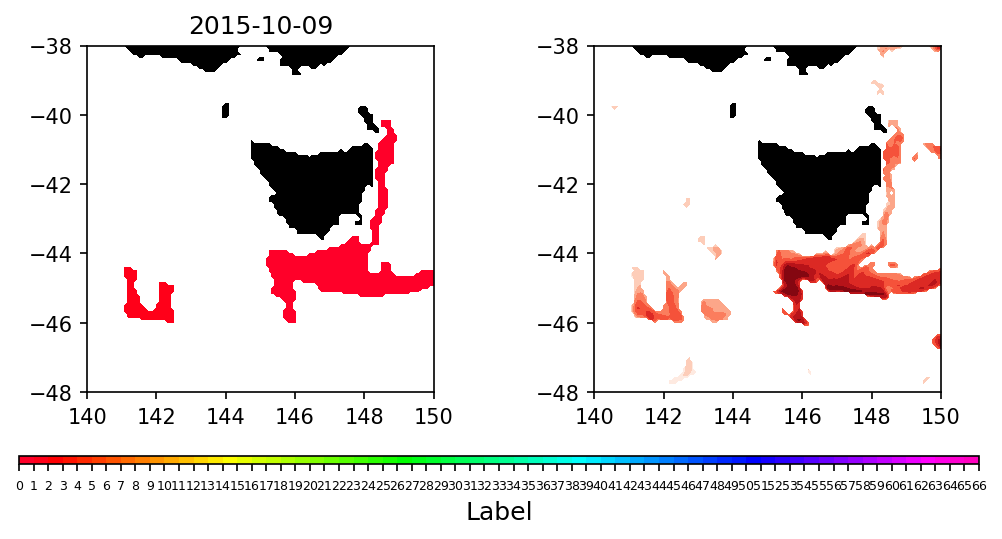

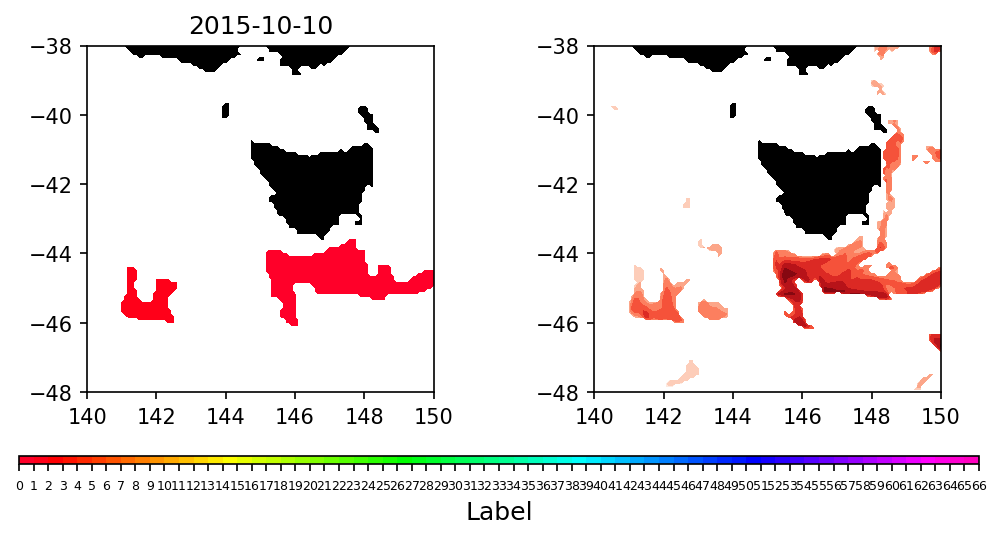

In [54]:
maxl = int(np.nanmax(blobs.values))
Nr_blobs = blobs.attrs['final objects tracked']
base_cmap = plt.get_cmap('gist_rainbow')
colors = base_cmap(np.linspace(0, 1, Nr_blobs))
custom_cmap = ListedColormap(colors)

cm = ListedColormap(np.random.random(size=(maxl, 3)).tolist())
lon = hot_water_short.x.data
lat = hot_water_short.y.data
t = 8500,
for t in range(0, 40): #len(hot_water_short.time.data)):
    
    fig, axs = plt.subplots(ncols=2, nrows =1, figsize=(8,3),dpi = 150)
    ax = axs[0]
    ax.set_title(str(hot_water_short.time[t].data)[:10])
    
    levels = np.linspace(0,Nr_blobs,Nr_blobs + 1)
    ax.contourf(lon,lat,mask.thetao.where(mask.thetao==0),colors='k') 
    cm = ax.contourf(lon,lat,blobs.isel(time=t).data, cmap = custom_cmap, #vmin=1, vmax=Nr_blobs
                    levels = levels)
    
    cbaxes = fig.add_axes([0.1, -0.05, 0.8, 0.019])
    cb = fig.colorbar(cm, orientation='horizontal',cax=cbaxes,aspect = 0.5,shrink=0.8, ax = ax1, 
                     ticks = levels,)
    cb.set_label('Label', size=12)
    cb.ax.tick_params(labelsize=6)
    
    ax.set_aspect('equal')
    ax = axs[1]
    ax.contourf(lon,lat,hot_water_short.thetao.isel(time=t).data, cmap = 'Reds')
    ax.contourf(lon,lat,mask.thetao.where(mask.thetao==0),colors='k') 
    ax.set_aspect('equal');

In [199]:
def calculate_hot_water(ds):
    ########################################
    ########## calculate anomalies
    ########################################
    tos = ds
    climatology = tos.groupby(tos.time.dt.month).mean()
    anomaly = tos.groupby(tos.time.dt.month) - climatology
    # Rechunk time dim
    if tos.chunks:
        tos = tos.chunk({'time': -1})
    percentile = .9
    threshold = tos.groupby(tos.time.dt.month).quantile(percentile, dim='time', keep_attrs=True, skipna=True)
    hot_water = anomaly.groupby(tos.time.dt.month).where(tos.groupby(tos.time.dt.month)>threshold)
    return hot_water, anomaly, threshold


def create_mask(ds):
    mask_ocean = 1 * np.ones(ds.thetao.shape[1:]) * np.isfinite(ds.isel(time=0))
    mask_land = 0 * np.ones(ds.thetao.shape[1:]) * np.isnan(ds.isel(time=0))
    mask = mask_ocean + mask_land
    mask1 = mask #.mean('latitude')
    mask1 = mask1.rename({'latitude': 'y'}).rename({'longitude': 'x'})
    return mask1
    

def make_ocetrac_plot(ds, choosen_depth, mask1, time_step1, time_step2, time_slice1, time_slice2):
    ########################################
    ########## get shorten timeframe and analysis oceatrac 
    ########################################

    mask = mask1.thetao.sel(depth = choosen_depth,method = 'nearest')
    hot_water_short = hot_water.sel(time = slice(time_slice1, time_slice2)).sel(depth = choosen_depth,method = 'nearest').drop('depth')#.mean('latitude')
    hot_water_short = hot_water_short.rename({'latitude': 'y'}).rename({'longitude': 'x'})
    Tracker = ocetrac.Tracker(hot_water_short.thetao, mask , radius=2, min_size_quartile=0.75, timedim = 'time', xdim = 'x', ydim='y', positive=True)
    blobs = Tracker.track()
    
    ########################################
    ########## PLOT SETTINGS
    ########################################
    maxl = int(np.nanmax(blobs.values))
    Nr_blobs = blobs.attrs['final objects tracked']
    base_cmap = plt.get_cmap('gist_rainbow')
    colors = base_cmap(np.linspace(0, 1, Nr_blobs))
    custom_cmap = ListedColormap(colors)

    cm = ListedColormap(np.random.random(size=(maxl, 3)).tolist())
    lon = hot_water_short.x.data
    lat = hot_water_short.y.data
    t = 8500,
    for t in range(time_step1, time_step2): #len(hot_water_short.time.data)):
        fig, axs = plt.subplots(ncols=2, nrows =1, figsize=(8,3),dpi = 150)
        ax = axs[0]
        ax.set_title(str(hot_water_short.time[t].data)[:10])
        
        levels = np.linspace(0,Nr_blobs,Nr_blobs + 1)
        ax.contourf(lon,lat,mask.where(mask==0),colors='k') 
        cm = ax.contourf(lon,lat,blobs.isel(time=t).data, cmap = custom_cmap, #vmin=1, vmax=Nr_blobs
                        levels = levels)
        
        cbaxes = fig.add_axes([0.1, -0.05, 0.8, 0.019])
        cb = fig.colorbar(cm, orientation='horizontal',cax=cbaxes,aspect = 0.5,shrink=0.8, ax = ax1, 
                         ticks = levels,)
        cb.set_label('Label', size=12)
        cb.ax.tick_params(labelsize=6)
        
        ax.set_aspect('equal')
        ax = axs[1]
        ax.set_title('Depth level: ' + str(choosen_depth))
        ax.contourf(lon,lat,hot_water_short.thetao.isel(time=t).data, cmap = 'Reds')
        ax.contourf(lon,lat,mask.where(mask==0),colors='k') 
        ax.set_aspect('equal');


    return





def make_ocetrac_plot_transect(ds, choosen_latitude, mask1, time_step1, time_step2, time_slice1, time_slice2):
    ########################################
    ########## get shorten timeframe and analysis oceatrac 
    ########################################

    mask = mask1.thetao.sel(y = choosen_latitude, method = 'nearest').drop('y')
    mask = mask.rename({'depth': 'y'})
    hot_water_short = hot_water.sel(time = slice(time_slice1, time_slice2)).sel(latitude = choosen_latitude,method = 'nearest').drop('latitude')#.mean('latitude')
    hot_water_short = hot_water_short.rename({'depth': 'y'}).rename({'longitude': 'x'})
    Tracker = ocetrac.Tracker(hot_water_short.thetao, mask , radius=1, min_size_quartile=0.75, timedim = 'time', xdim = 'x', ydim='y', positive=True)


    # print(Tracker.new_labels())
    
    # if Tracker._wrap(labels) == 0:
        
        # print("Object is empty")
        # return
    # else:
        
        # print(Tracker.dir())
        
    blobs = Tracker.track()
    
    ########################################
    ########## PLOT SETTINGS
    ########################################
    maxl = int(np.nanmax(blobs.values))
    Nr_blobs = blobs.attrs['final objects tracked']
    base_cmap = plt.get_cmap('gist_rainbow')
    colors = base_cmap(np.linspace(0, 1, Nr_blobs))
    custom_cmap = ListedColormap(colors)

    cm = ListedColormap(np.random.random(size=(maxl, 3)).tolist())
    lon = hot_water_short.x.data
    lat = hot_water_short.y.data
    t = 8500,
    for t in range(time_step1, time_step2): #len(hot_water_short.time.data)):
        fig, axs = plt.subplots(ncols=2, nrows =1, figsize=(8,3),dpi = 150)
        ax = axs[0]
        ax.set_title(str(hot_water_short.time[t].data)[:10])
        
        levels = np.linspace(0,Nr_blobs,Nr_blobs + 1)
        ax.contourf(lon,lat,mask.where(mask==0),colors='k') 
        cm = ax.contourf(lon,lat,blobs.isel(time=t).data, cmap = custom_cmap, #vmin=1, vmax=Nr_blobs
                        levels = levels)
        
        cbaxes = fig.add_axes([0.1, -0.05, 0.8, 0.019])
        cb = fig.colorbar(cm, orientation='horizontal',cax=cbaxes,aspect = 0.5,shrink=0.8, ax = ax1, 
                         ticks = levels,)
        cb.set_label('Label', size=12)
        cb.ax.tick_params(labelsize=6)
        
        ax.invert_yaxis()
        ax = axs[1]
        ax.set_title('Latitude: ' + str(choosen_latitude))
        ax.contourf(lon,lat,hot_water_short.thetao.isel(time=t).data, cmap = 'Reds')
        ax.contourf(lon,lat,mask.where(mask==0),colors='k') 
        ax.invert_yaxis()
       
    return

In [202]:
# set depth range to focus on
depth_range = [0,10,20,50,75,100,120, 150,200]

## which dataset in which depth range
ds = ds_TAS.sel(depth = depth_range, method = 'nearest')

##calculate hot water data for ocetrac
print(datetime.now())
hot_water, anomaly, threshold = calculate_hot_water(ds)
print(datetime.now())

2024-08-26 11:33:53.366499


C:\Users\24048369\AppData\Local\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
C:\Users\24048369\AppData\Local\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
C:\Users\24048369\AppData\Local\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
C:\Users\24048369\AppData\Local\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
C:\Users\24048369\AppData\Local\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
C:\Users\24048369\AppData\Local\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_bas

2024-08-26 11:37:27.064255



Depth level: 0
minimum area: 191.0
inital objects identified 	 2868
final objects tracked 	 48

Depth level: 10
minimum area: 186.0
inital objects identified 	 2975
final objects tracked 	 43

Depth level: 20
minimum area: 191.25
inital objects identified 	 2944
final objects tracked 	 42

Depth level: 50
minimum area: 179.0
inital objects identified 	 3305
final objects tracked 	 65

Depth level: 75
minimum area: 140.0
inital objects identified 	 3272
final objects tracked 	 50

Depth level: 100
minimum area: 180.75
inital objects identified 	 3138
final objects tracked 	 38

Depth level: 120
minimum area: 158.0
inital objects identified 	 3269
final objects tracked 	 54

Depth level: 150
minimum area: 172.25
inital objects identified 	 3092
final objects tracked 	 46

Depth level: 200
minimum area: 177.0
inital objects identified 	 3091
final objects tracked 	 40


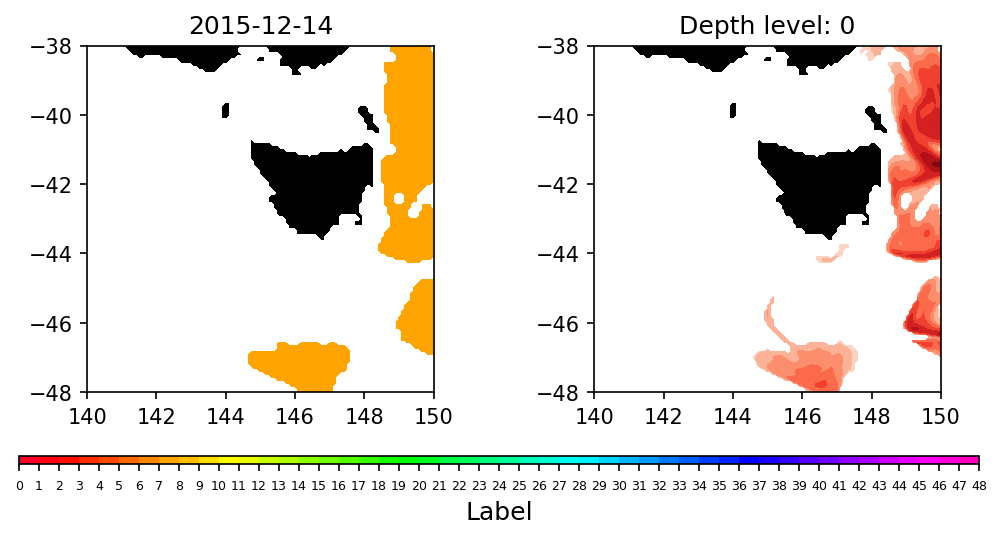

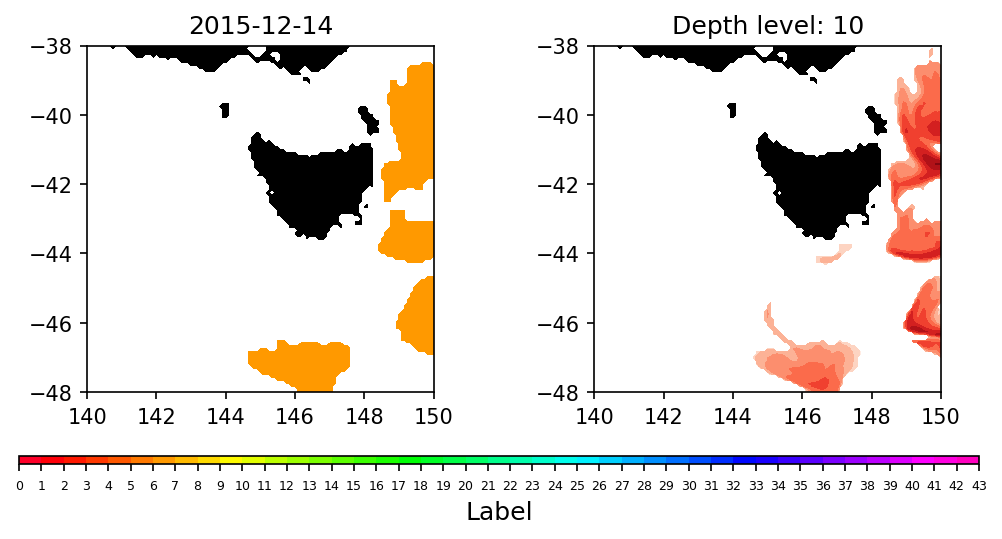

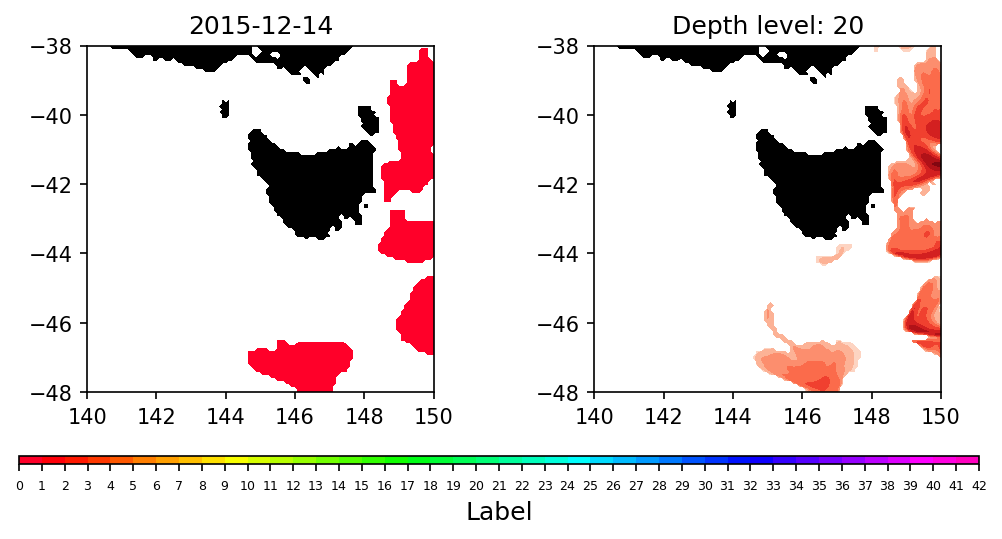

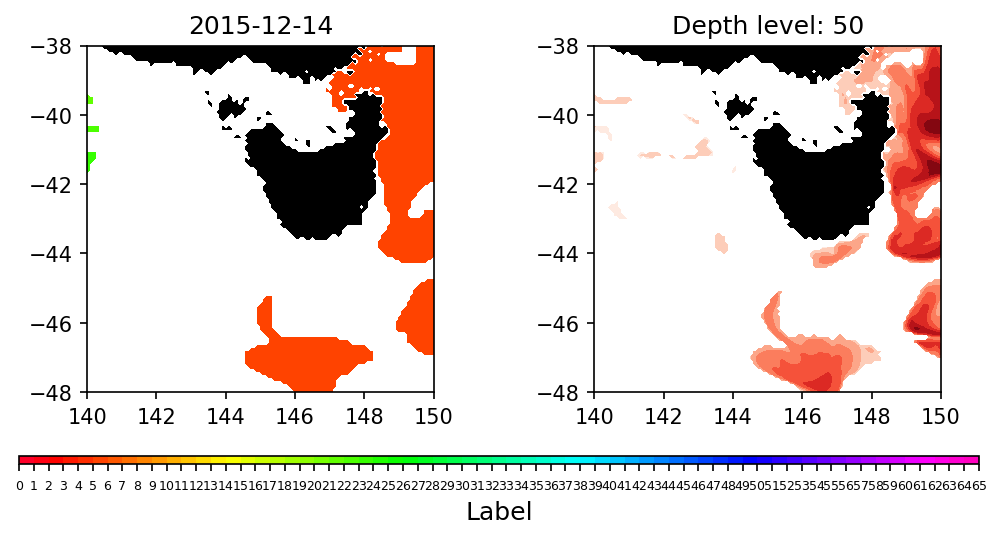

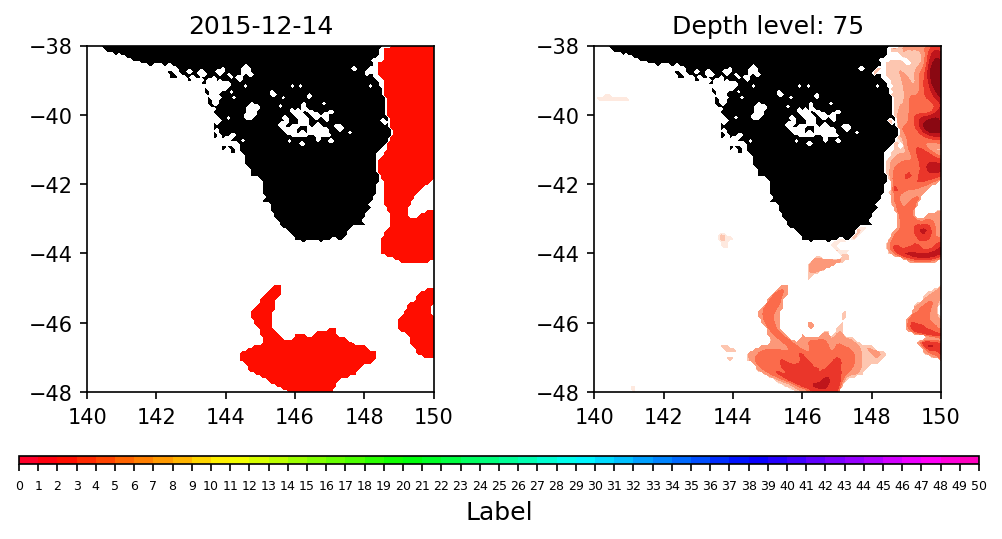

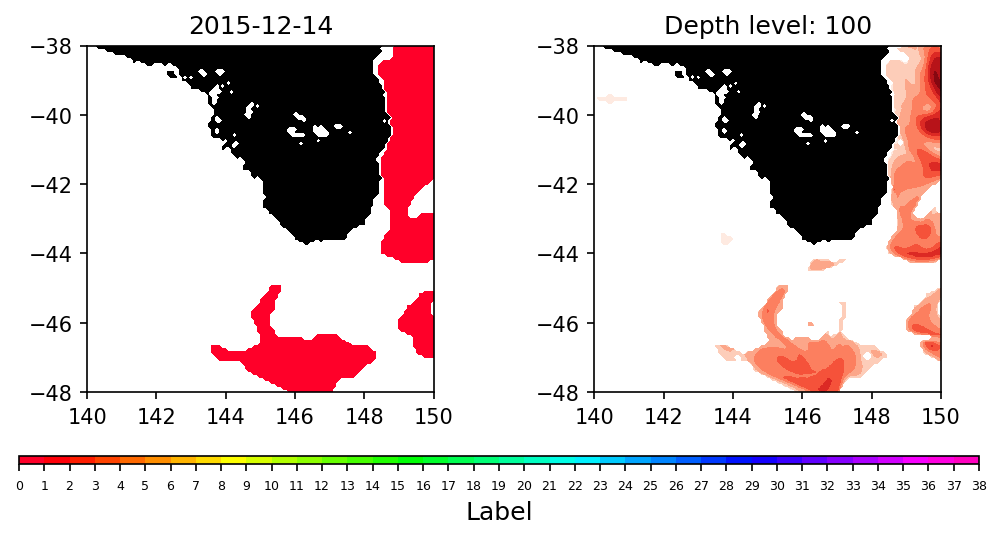

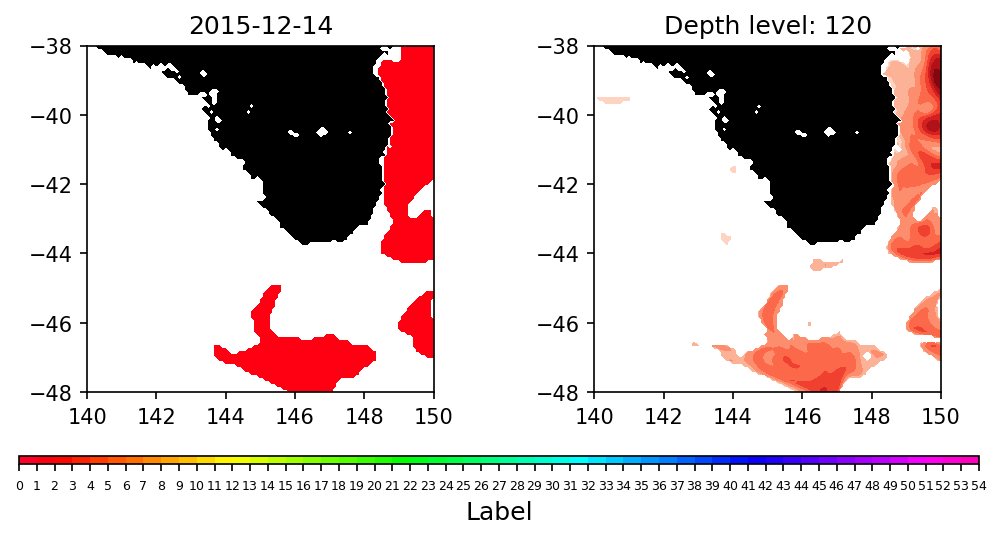

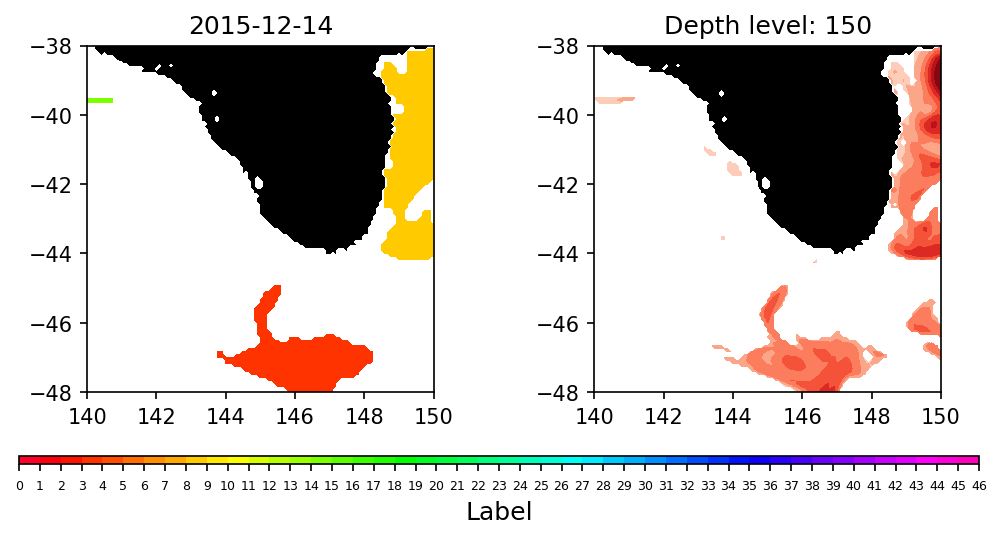

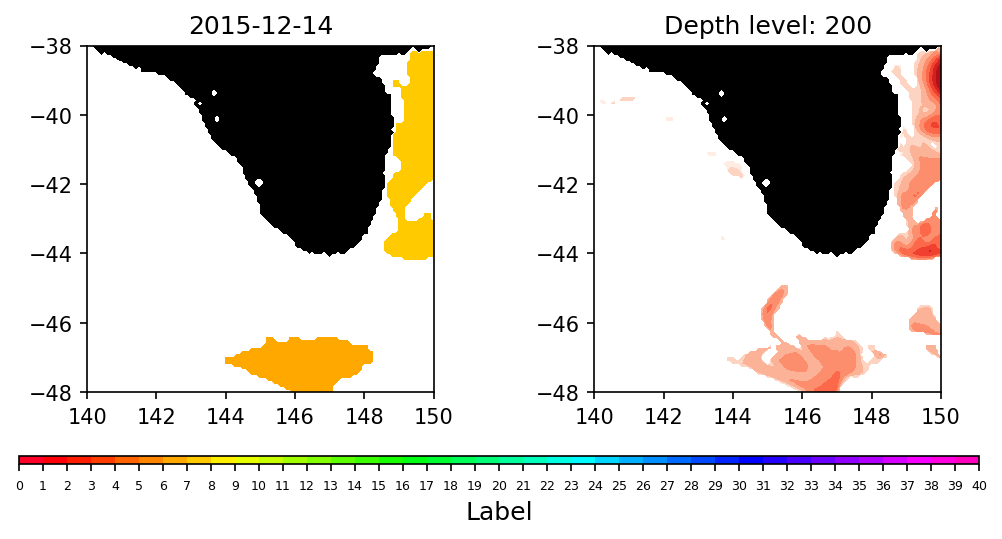

In [203]:
time_step1, time_step2 = 104,105                         ### time steps for plotting (integer)
time_slice1, time_slice2 = '2015-09-01','2016-07-30'   #### time slices on time we want to foces and analyse oceatrac  
choosen_depth = 50                                     ## which depth level to analyse


### create mask of landmass based on original dataset!
mask1 = create_mask(ds)

for choosen_depth in depth_range:
    print('')
    print('Depth level: ' + str(choosen_depth))
    make_ocetrac_plot(hot_water, choosen_depth,mask1, time_step1, time_step2, time_slice1, time_slice2)



In [197]:
# set depth range to focus on
latitude_range = [-47,-46,-44,-42,-40]

## which dataset in which depth range
ds = ds_TAS.sel(latitude = latitude_range, method = 'nearest')

##calculate hot water data for ocetrac
print(datetime.now())
hot_water, anomaly, threshold = calculate_hot_water(ds)
print(datetime.now())

2024-08-26 11:27:30.916241


C:\Users\24048369\AppData\Local\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
C:\Users\24048369\AppData\Local\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
C:\Users\24048369\AppData\Local\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
C:\Users\24048369\AppData\Local\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
C:\Users\24048369\AppData\Local\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
C:\Users\24048369\AppData\Local\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_bas

2024-08-26 11:28:17.658601


-47
minimum area: 46.0
inital objects identified 	 2
final objects tracked 	 1
-46
minimum area: 5.0
inital objects identified 	 1
final objects tracked 	 1
-44
minimum area: 78.0
inital objects identified 	 1356
final objects tracked 	 23
-42
minimum area: 60.0
inital objects identified 	 1116
final objects tracked 	 34
-40
minimum area: 49.0
inital objects identified 	 1385
final objects tracked 	 31


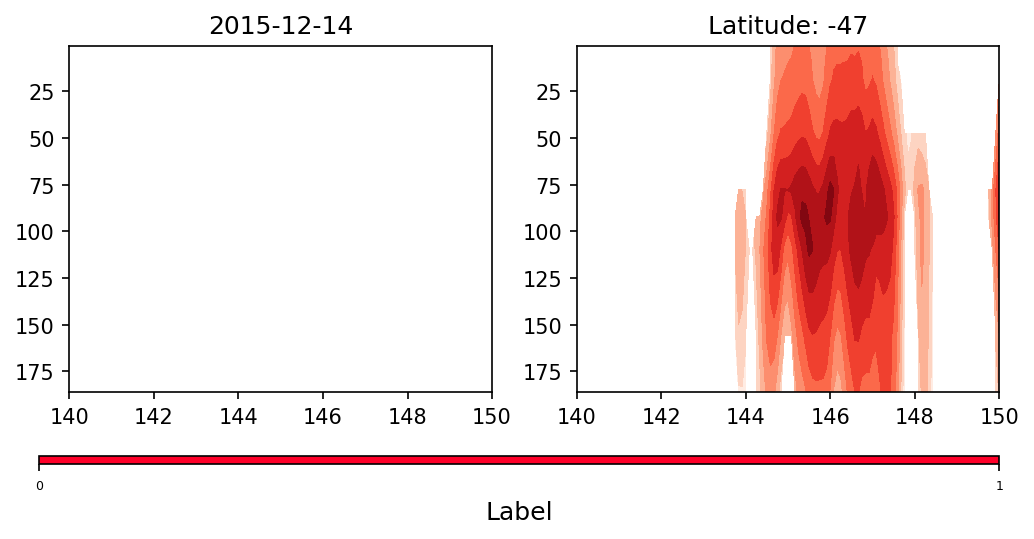

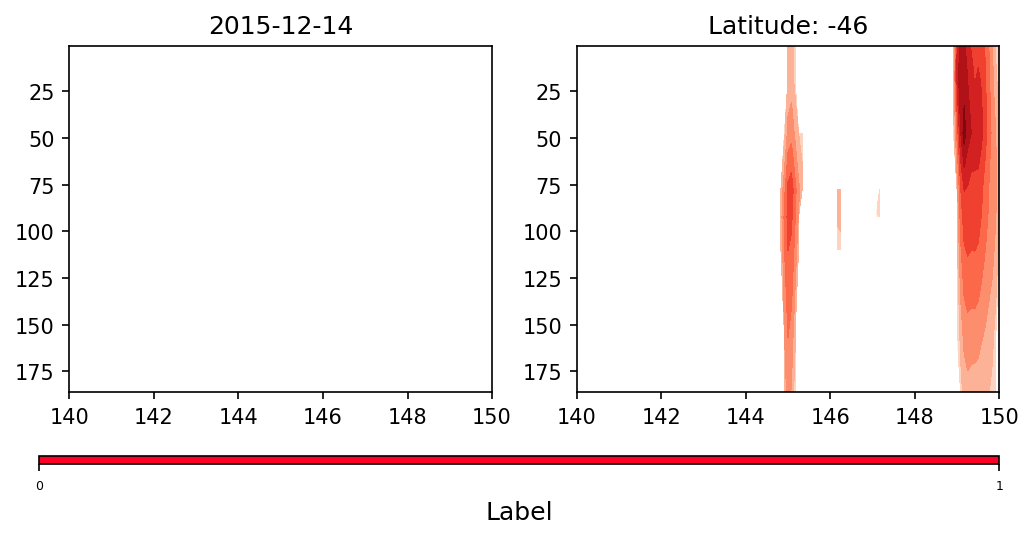

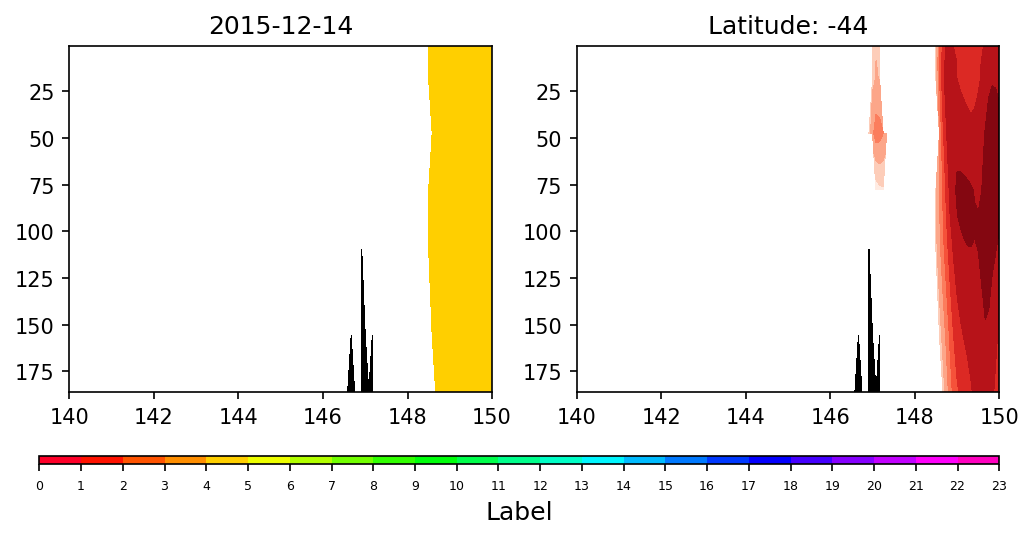

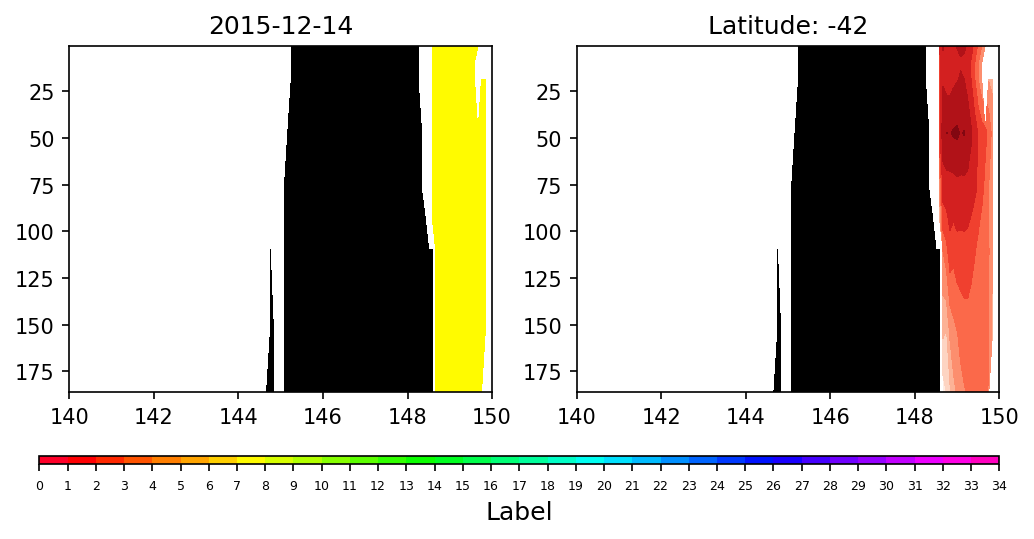

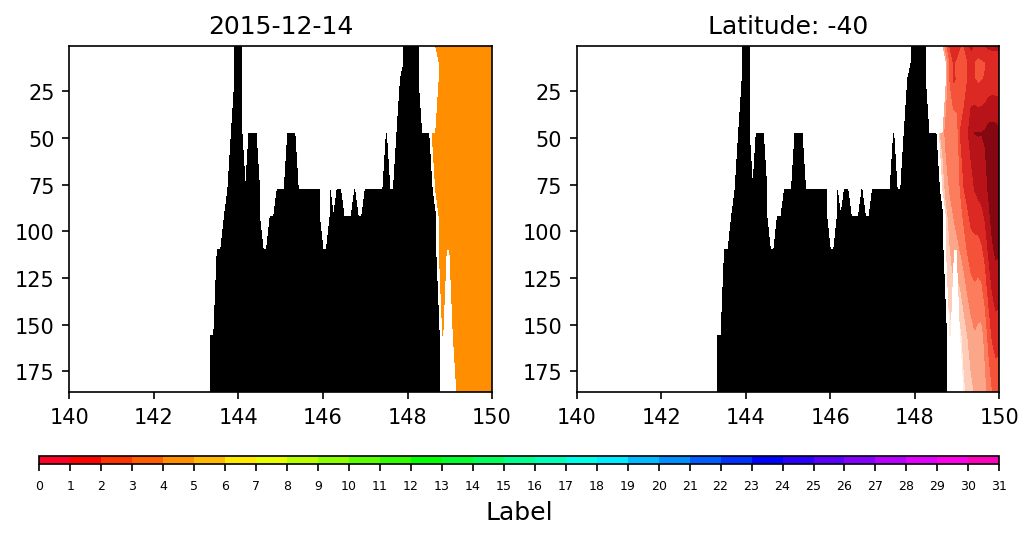

In [208]:
time_step1, time_step2 = 104, 105         #214,225      #           ### time steps for plotting (integer)
time_slice1, time_slice2 = '2015-09-01','2016-07-30'   #### time slices on time we want to foces and analyse oceatrac  
choosen_depth = 50   

### create mask of landmass based on original dataset!
mask1 = create_mask(ds)

for choosen_latitude in latitude_range:  #[-46, -44,-42,-40]: # [-47]: #]
    print(choosen_latitude)
    make_ocetrac_plot_transect(hot_water, choosen_latitude, mask1, time_step1, time_step2, time_slice1, time_slice2)
# mask1